In [3]:
import sys
!{sys.executable} -m pip install lightkurve

  Created wheel for astroquery: filename=astroquery-0.4-py3-none-any.whl size=3582513 sha256=957c0be76c0e51f1513483fb95b06d73280c916924f957aae4ce6f1916407784
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\da\e4\ca\c71e05a621dfd3a1c51e24d89d38404dc4ac4ec3ce416d363b
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11381 sha256=73ab11f4a134408cfaebf5e4e0f4ee64d0662fa1fec43a50b9e58b3e28c6847c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\93\08\0c\1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1279 sha256=e82b49a7d3a0a719880dc667e2e7d0795392894a880af47a5c018ed6b3e22075
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\0a\9e\ba\20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
  Created wheel for oktopus: filename=oktopus-0.1.2-py3-none-any.whl size=12785 sha256=8fc079861f09c01dd1a57e0a0f589d7ce4b0968efbb09bb2dcd7a8965f154f09
  Stored in di

In [2]:
from platform import python_version

print(python_version())

3.7.6


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.timeseries import LombScargle

D:\conda\lib\site-packages\lightkurve\search.py:233: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


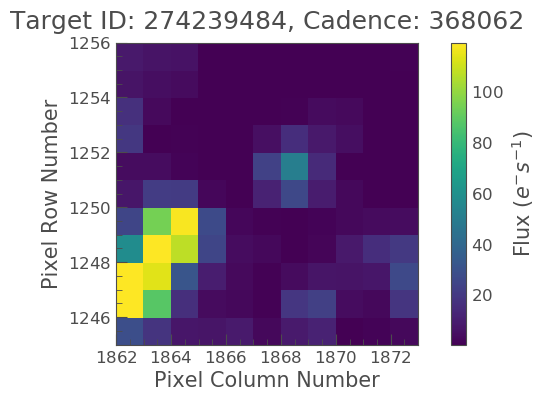

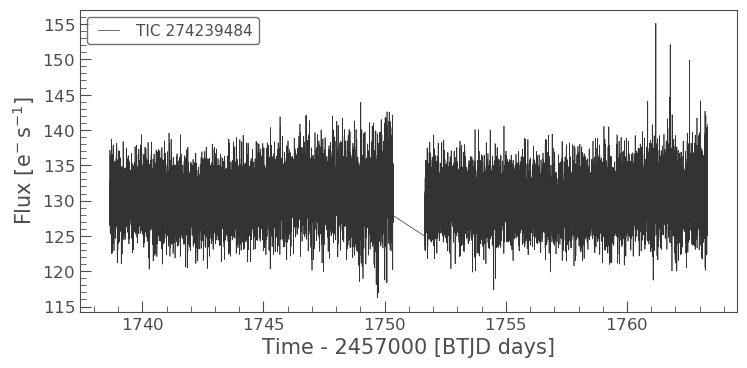

In [46]:
import lightkurve as lk

pixels = lk.search_targetpixelfile("GD356").download()
pixels.plot()

lightcurve = pixels.to_lightcurve()
lightcurve.plot()

In [47]:
errs = lightcurve.flux_err
flux = lightcurve.flux
time = lightcurve.time

In [48]:
oldFlux = flux
oldTime = time

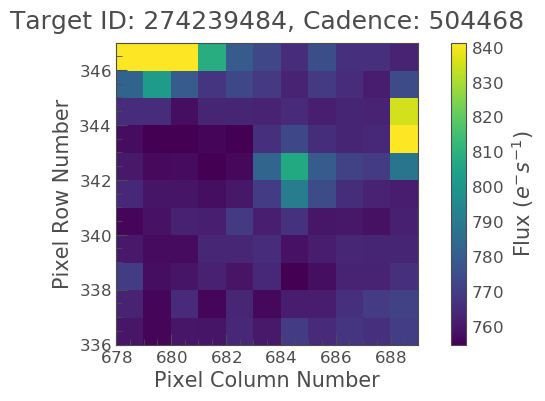

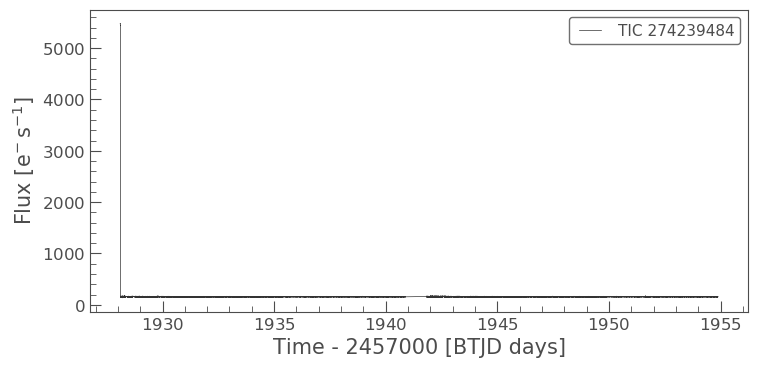

In [5]:
pixels = lk.search_targetpixelfile("GD356", sector=23).download()
pixels.plot()

lightcurve = pixels.to_lightcurve()
lightcurve.plot()

In [6]:
errsNew = lightcurve.flux_err
fluxNew = lightcurve.flux
timeNew = lightcurve.time

In [14]:
from astropy.timeseries import LombScargle
freq = np.linspace(12, 14, 10000)
power = LombScargle(oldTime,oldFlux).power(freq)

NameError: name 'oldTime' is not defined

(12, 13)

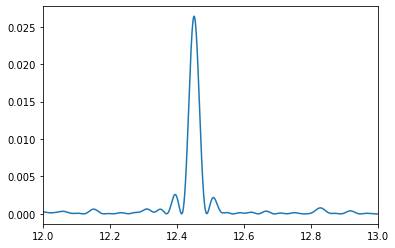

In [50]:
plt.plot(freq,power)
plt.xlim(12,13)

In [13]:
power = LombScargle(timeNew,fluxNew).power(freq)

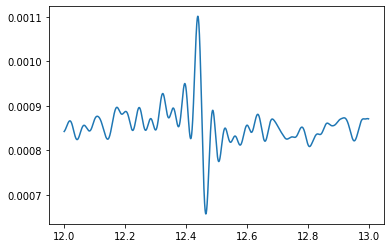

In [27]:
freq=np.linspace(12,13,10000)
power = LombScargle(timeNew,fluxNew).power(freq)
plt.plot(freq,power)
#plt.xlim(12,13)

158.88329


(100, 200)

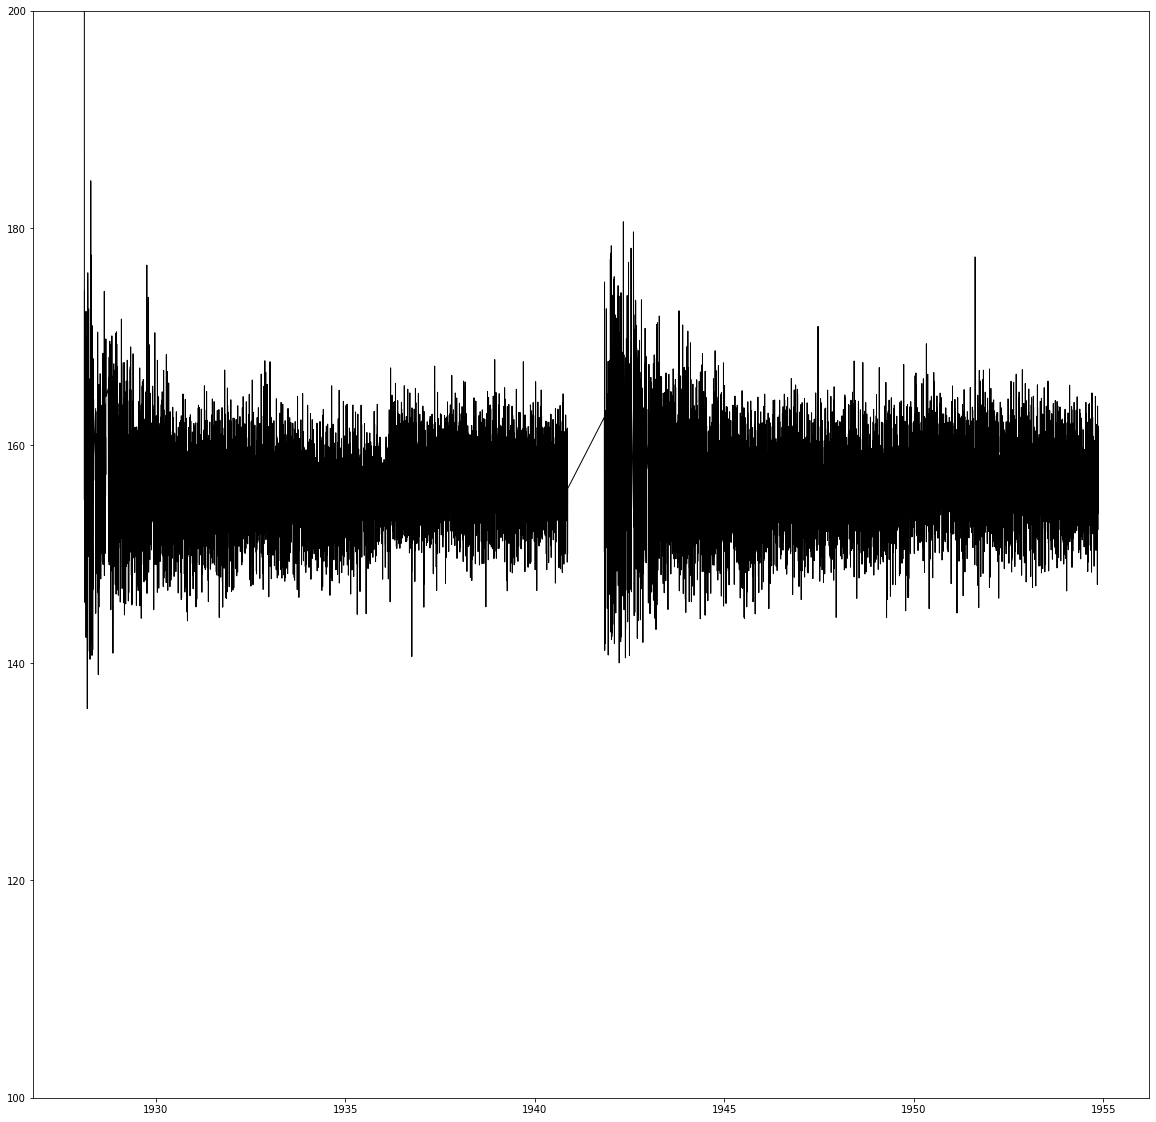

In [21]:
plt.figure(figsize=(20,20))
print(np.mean(fluxNew))
plt.plot(timeNew,fluxNew, c='k', lw=1)
plt.ylim(100,200)

In [28]:
fluxAll = np.append(oldFlux, fluxNew)
timeAll = np.append(oldTime, timeNew)

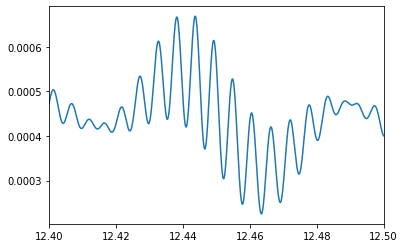

In [31]:
freqM=np.linspace(12.4,12.5,100000)
power = LombScargle(timeAll,fluxAll).power(freqM)
plt.xlim(12.4,12.5)
plt.plot(freqM,power)

In [8]:
np.mean(errs)

5.1659656

In [12]:
np.mean(flux)/np.mean(errs)

25.234678

<ErrorbarContainer object of 3 artists>

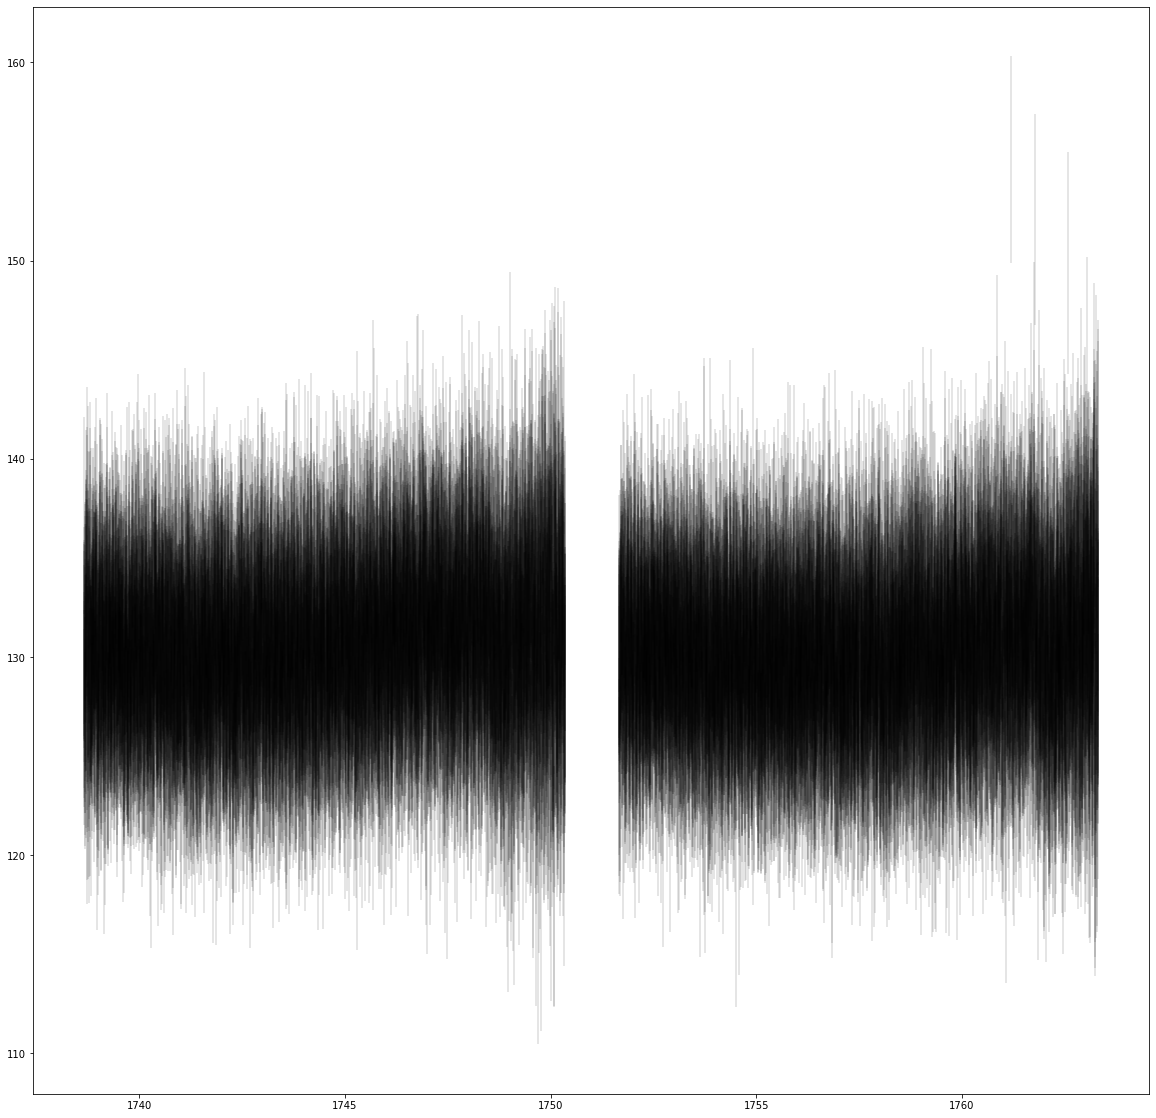

In [19]:
plt.figure(figsize=(20,20))
plt.errorbar(time,flux,yerr=errs, c='k', ls='', lw=0.2)

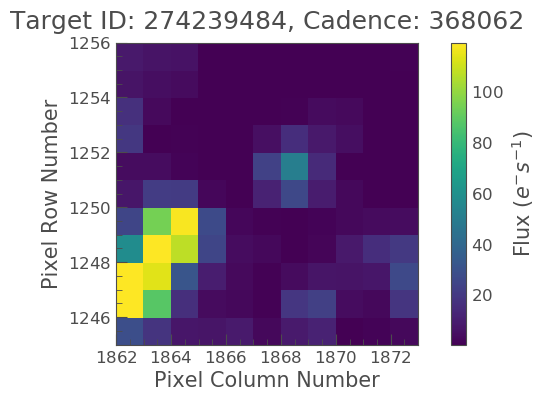

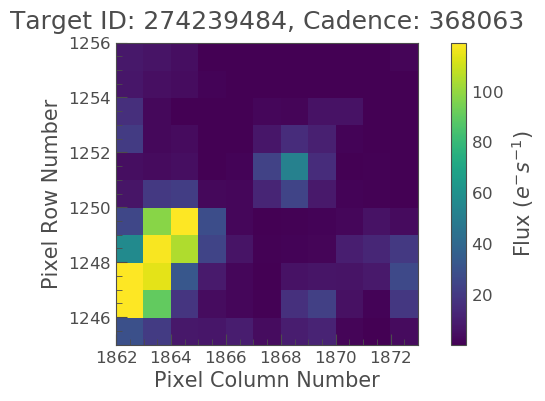

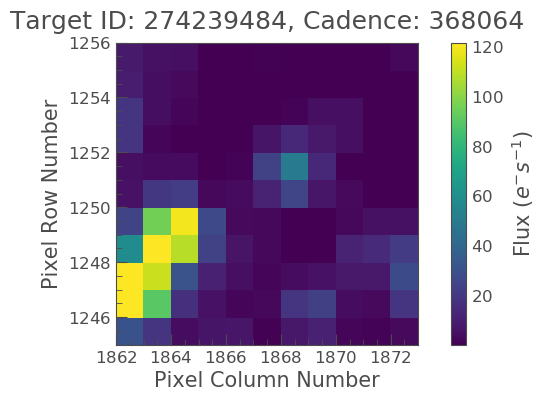

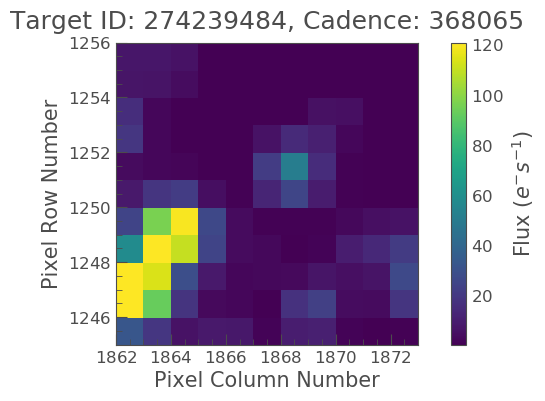

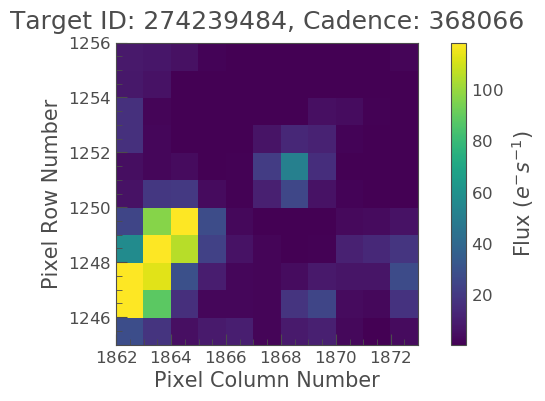

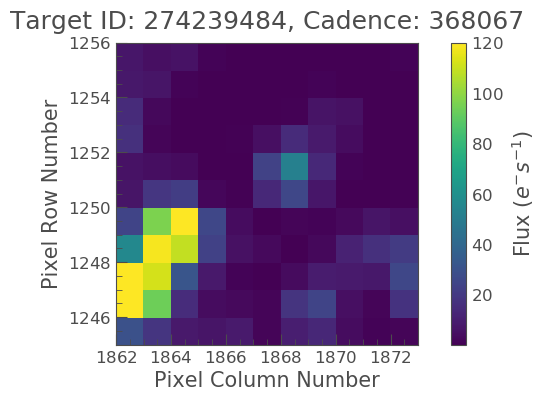

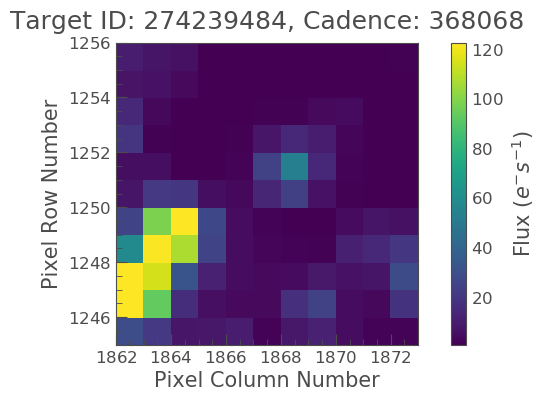

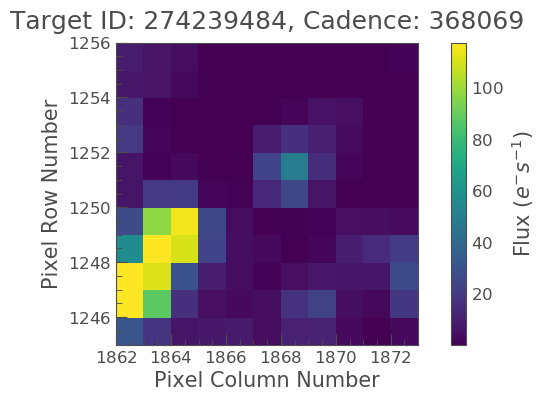

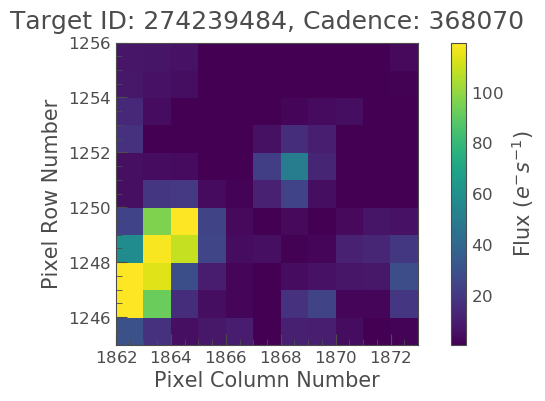

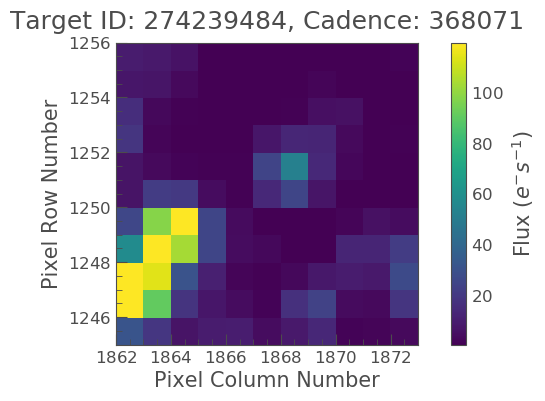

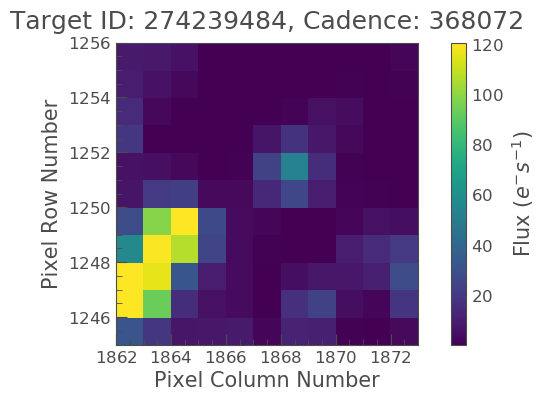

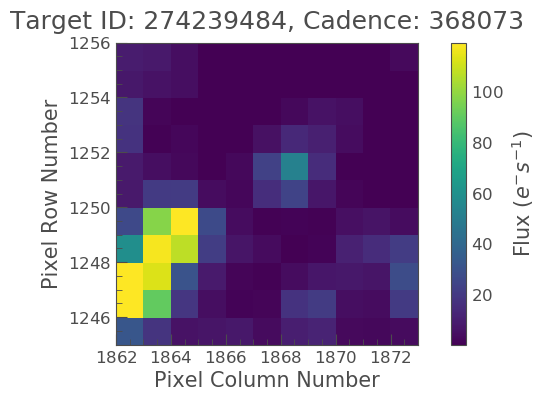

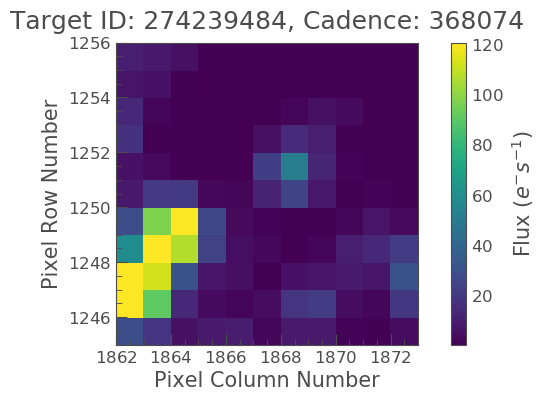

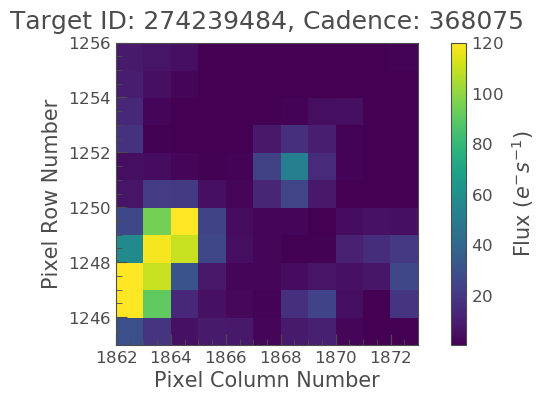

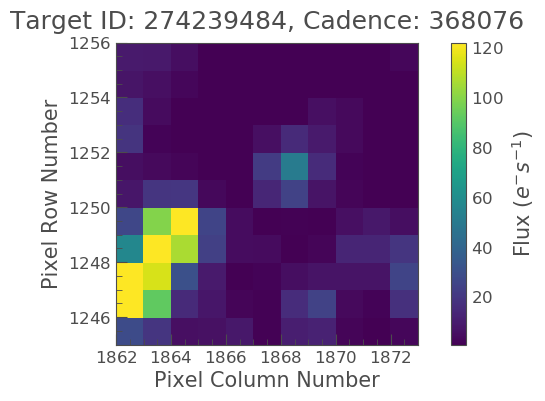

In [24]:
for i in range(15):
    pixels.plot(frame=i)

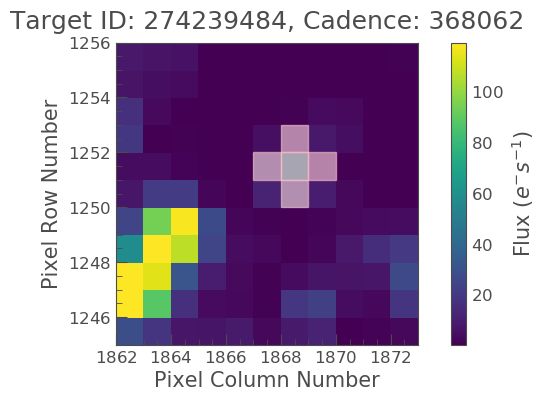

In [22]:
pixels.plot(aperture_mask=pixels.pipeline_mask)

In [25]:
pixels.pipeline_mask
#you can change mask

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False],
       [False, False, False, False, False,  True,  True,  True, False,
        False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, Fal

In [32]:
custom_mask = np.array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False],
       [False, False, False, False, False,  True,  True, False, False,
        False, False],
       [False, False, False, False, False, False,  False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False]])

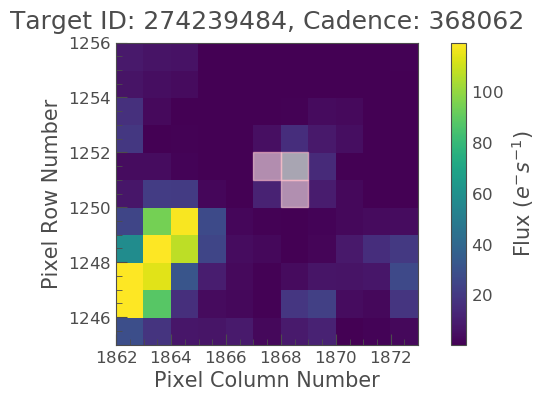

In [33]:
pixels.plot(aperture_mask=custom_mask)

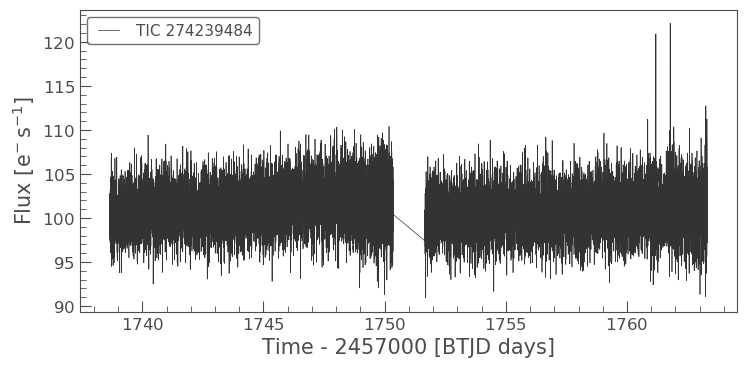

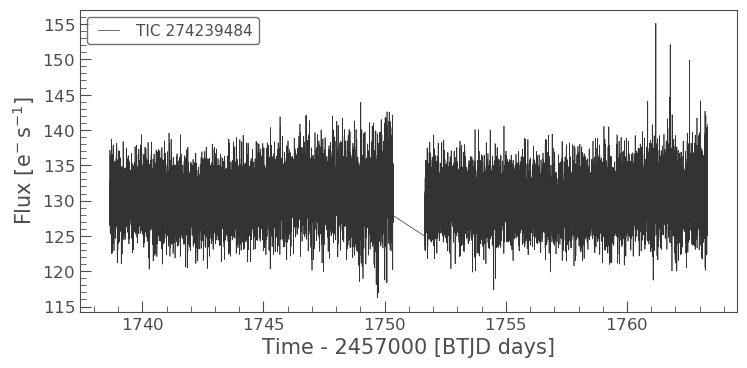

In [35]:
lc = pixels.to_lightcurve(aperture_mask=custom_mask)
lc.plot()
lightcurve.plot()

In [36]:
lc.estimate_cdpp()

6948.09612661552

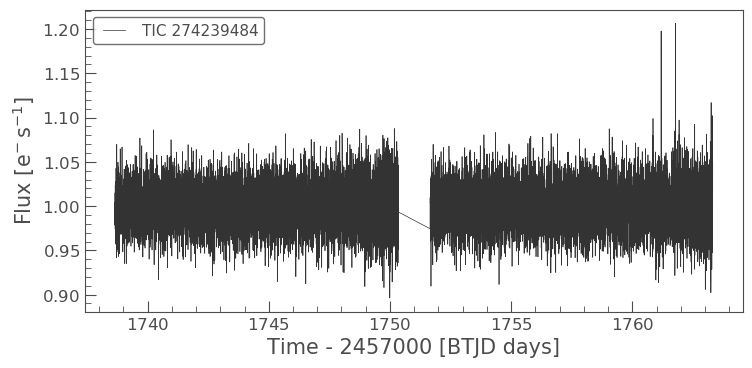

In [37]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()

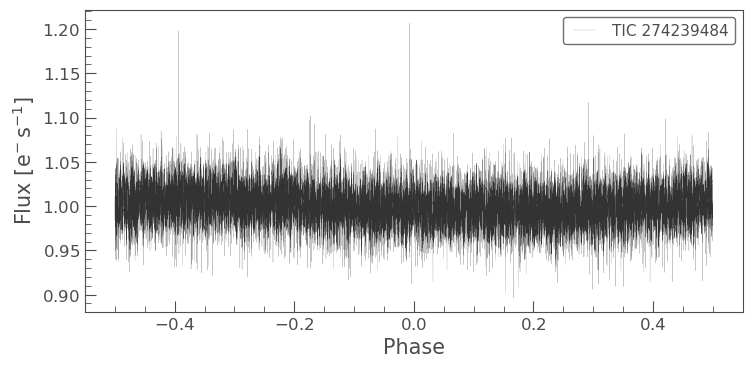

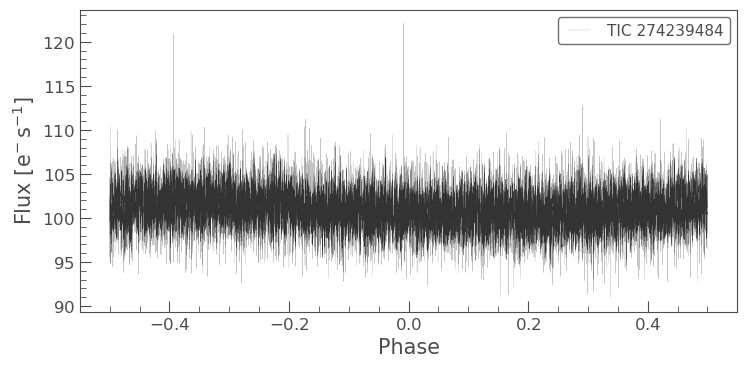

In [41]:
folded_lc = flat_lc.fold(period=0.080300078)
folded_lc.plot(lw=0.1)
folded_lcOr = lc.fold(period=0.080300078)
folded_lcOr.plot(lw=0.1);

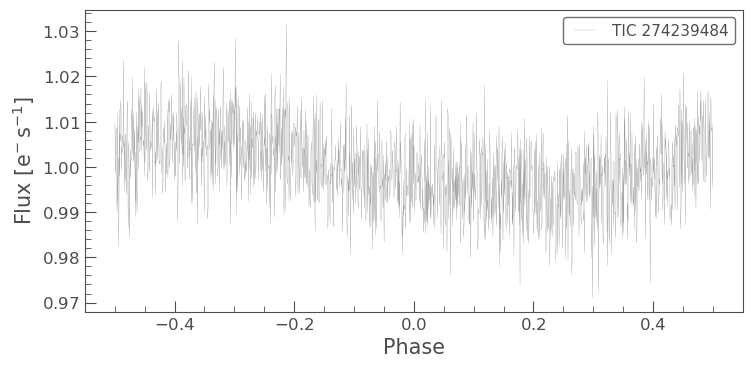

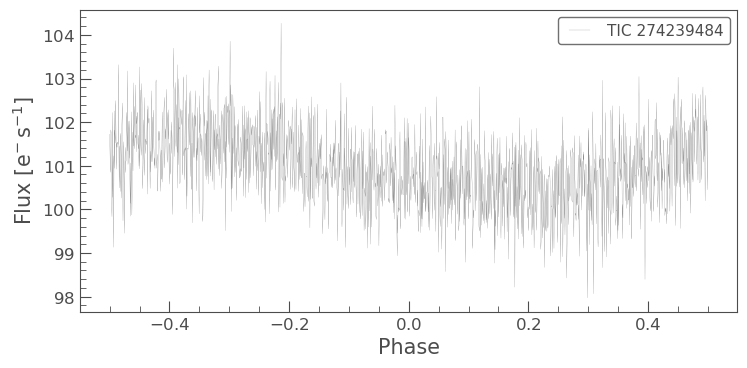

In [43]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot(lw=0.1)

binned_lcOr = folded_lcOr.bin(binsize=10)
binned_lcOr.plot(lw=0.1)

In [44]:
lc = lk.search_lightcurvefile('GD356').download().PDCSAP_FLUX.remove_nans()

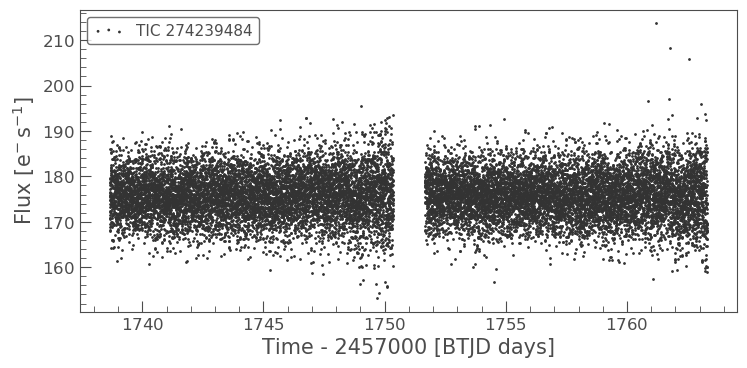

In [45]:
lc.scatter()

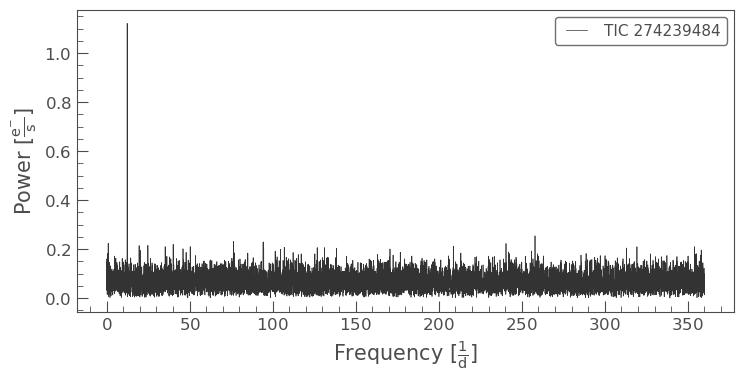

In [46]:
pg = lc.to_periodogram(oversample_factor=1)
pg.plot()

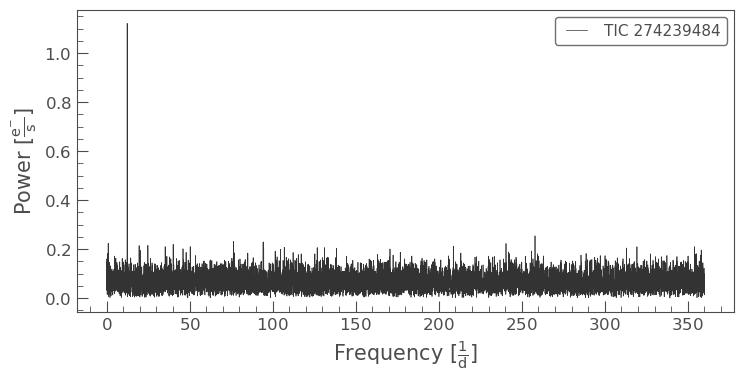

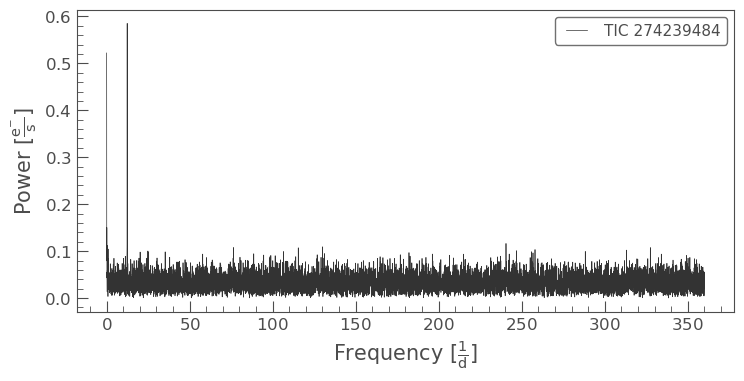

In [47]:
lcCustom = pixels.to_lightcurve(aperture_mask=custom_mask)
pgCustom = lcCustom.to_periodogram(oversample_factor=1)
pg.plot()
pgCustom.plot()

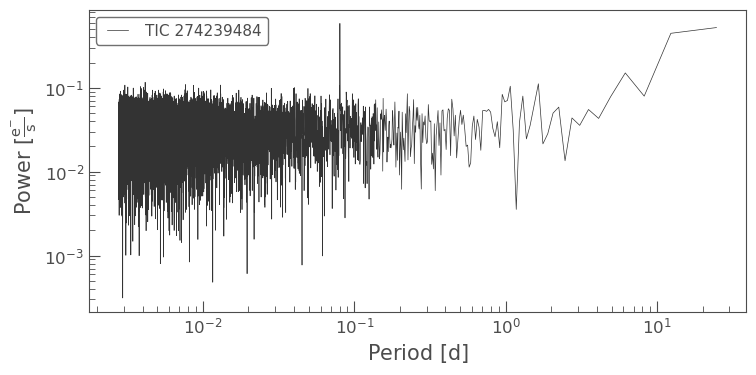

In [48]:
pgCustom.plot(view='period', scale='log')

In [49]:
pg.period_at_max_power

<Quantity 0.08034596 d>

In [50]:
pgCustom.period

<Quantity [2.46662093e+01, 1.23331046e+01, 8.22206976e+00, ...,
           2.77835203e-03, 2.77803911e-03, 2.77772627e-03] d>

In [51]:
pgCustom.power

<Quantity [0.52211998, 0.44597875, 0.07947721, ..., 0.02028531, 0.03909636,
           0.03081014] electron / s>

In [54]:
pixels = lk.search_targetpixelfile("GD356").download(quality_bitmask='hardest')
model = pixels.get_model()

AttributeError: 'TessTargetPixelFile' object has no attribute 'get_model'

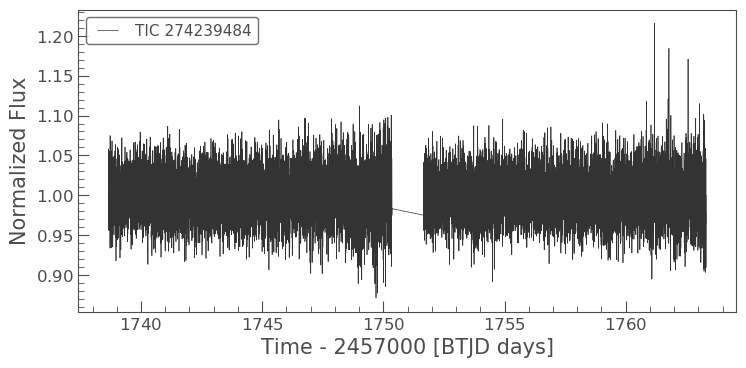

In [56]:
lc = lk.search_lightcurvefile('gd356').download_all().PDCSAP_FLUX.stitch()
lc.plot()

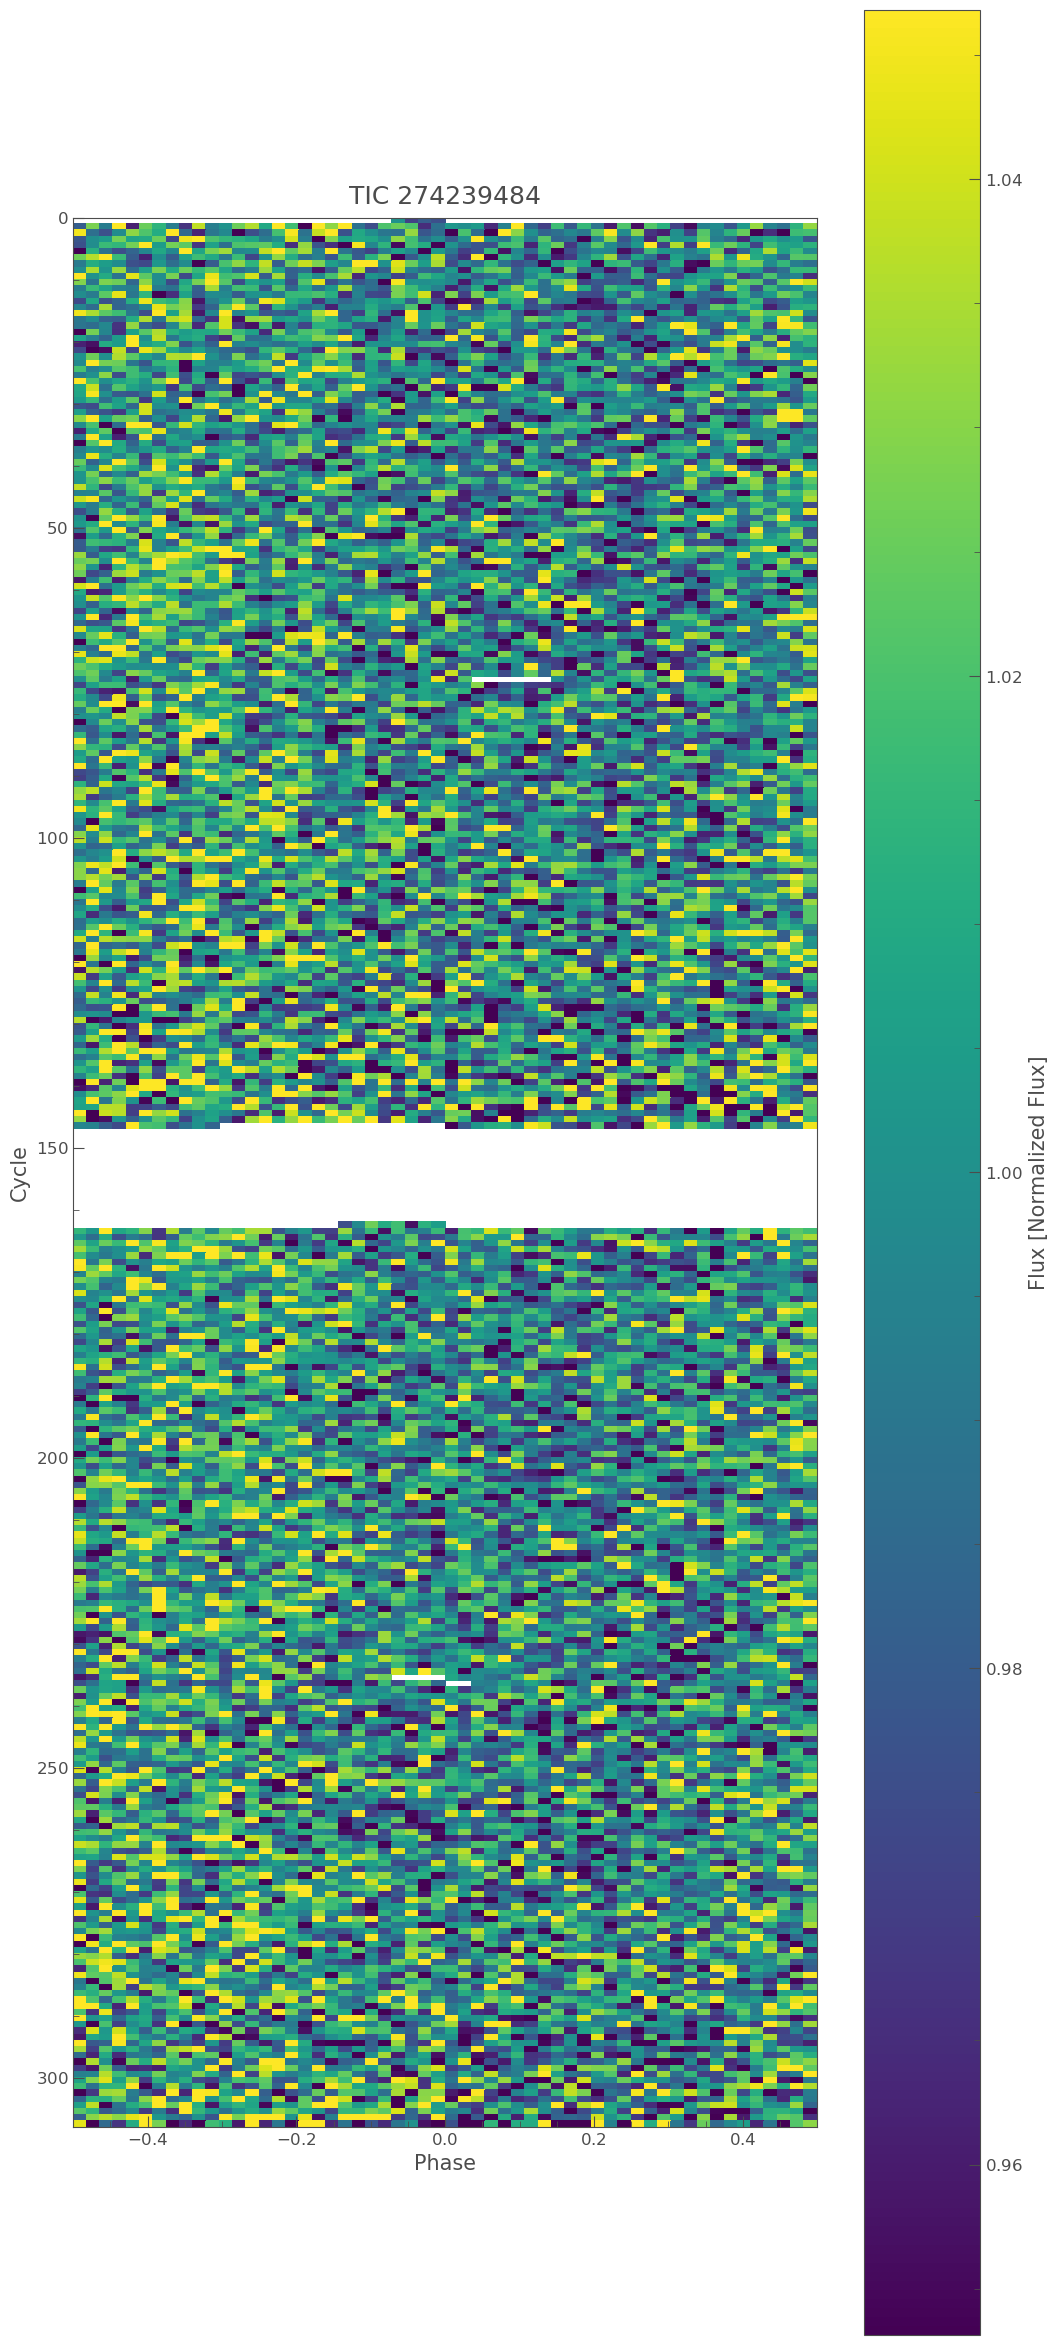

In [59]:
folded_lc = lc.fold(period=0.080300078)

folded_lc.plot_river()

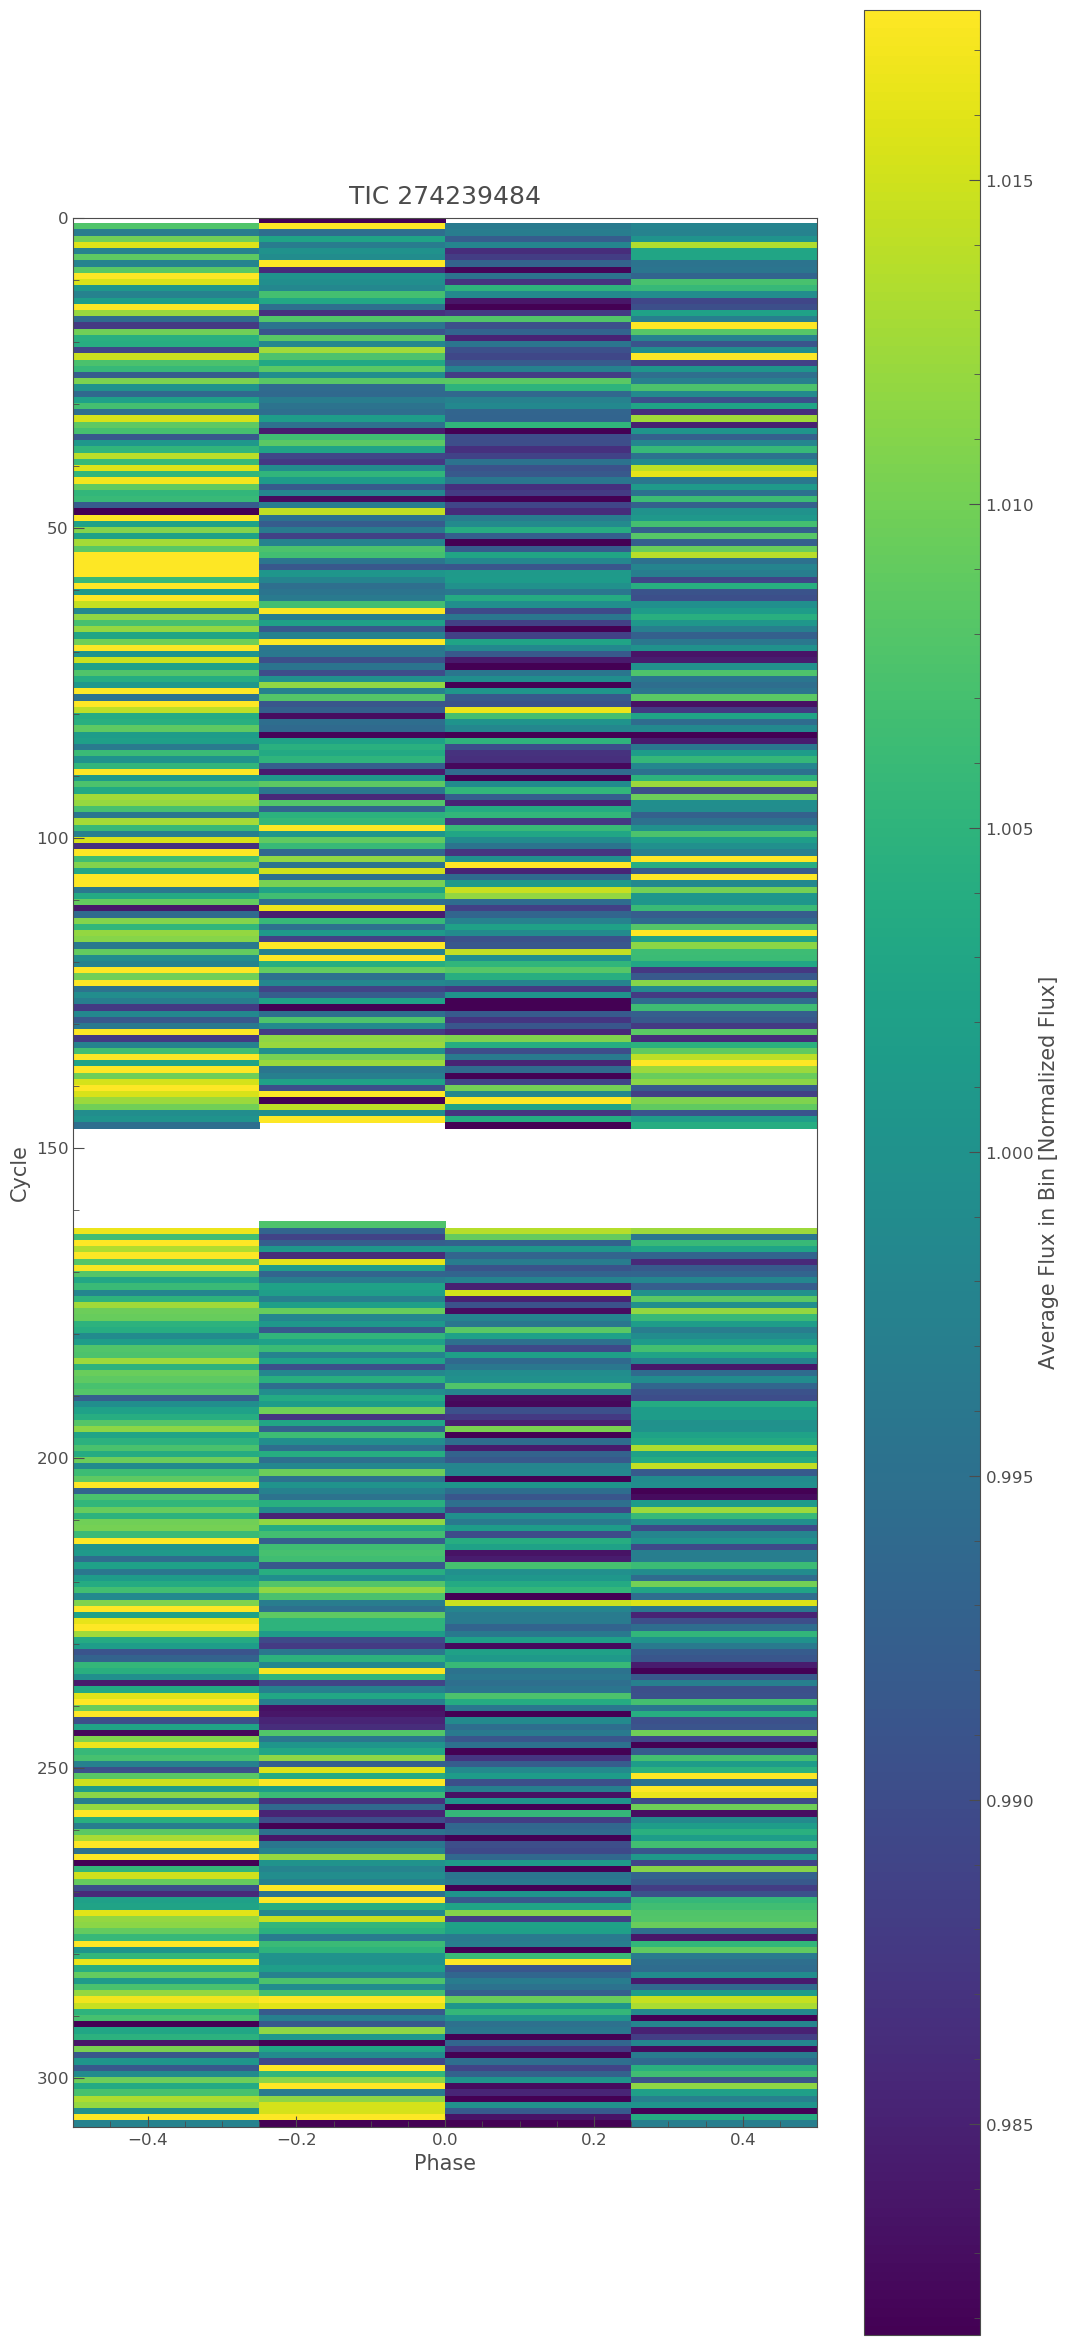

In [61]:
folded_lc.plot_river(bin_points=10, method='median')

In [63]:
#pixels.interact()

In [64]:
regressors = pixels.flux[:, ~pixels.pipeline_mask]

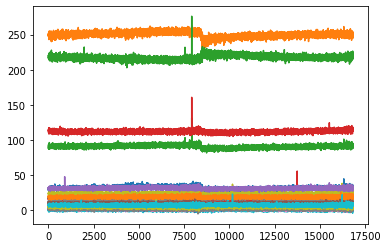

In [65]:
plt.plot(regressors[:, :30])

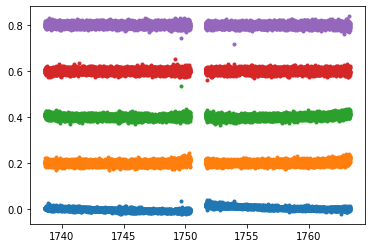

In [73]:
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(5)
plt.plot(pixels.time, dm.values + np.arange(5)*0.2, '.')

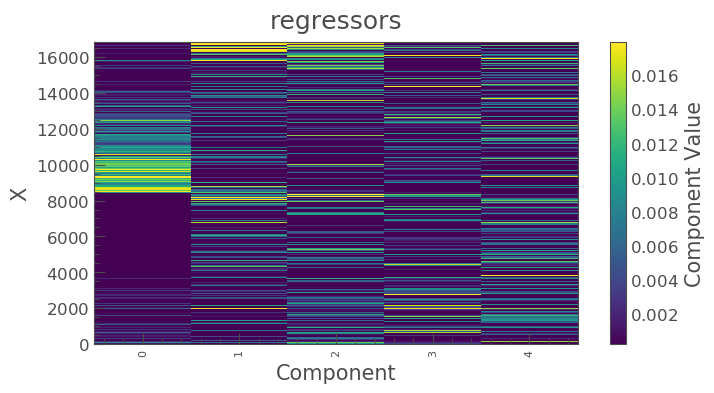

In [74]:
dm.plot()

In [81]:
dmN = dmN.append_constant()
corrector = lk.RegressionCorrector(lc)

In [82]:

corrected_lc = corrector.correct(dmN)
ax = lc.plot(label='Raw light curve')
corrected_lc.plot(ax=ax, label='Corrected light curve');


IndexError: boolean index did not match indexed array along dimension 0; dimension is 16810 but corresponding boolean dimension is 16812

In [4]:
pg = lightcurve.to_periodogram(maximum_frequency=100, minimum_frequency=0.1)

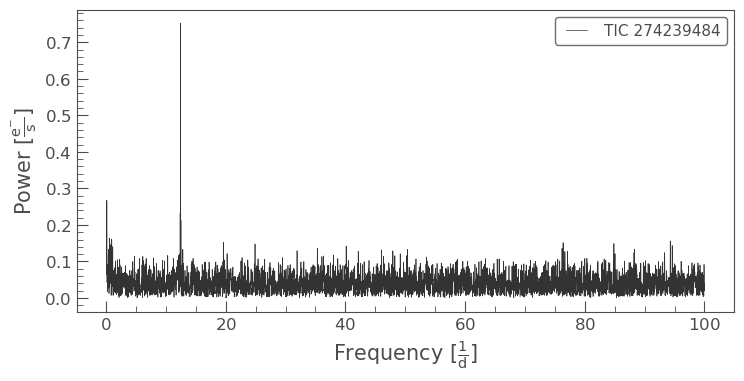

In [5]:
ax = pg.plot()

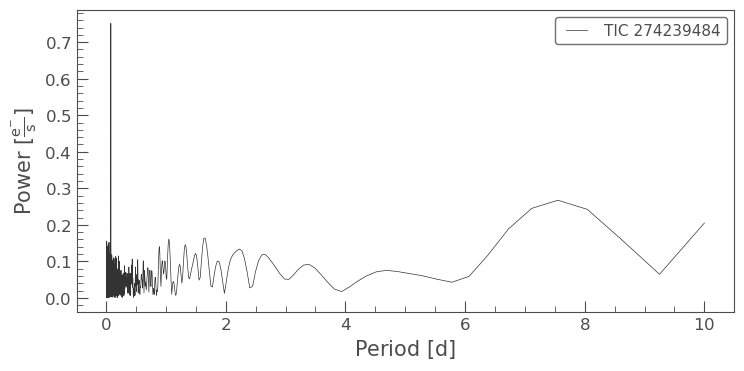

In [6]:
ax = pg.plot(view='Period')

In [15]:
import astropy.units as u

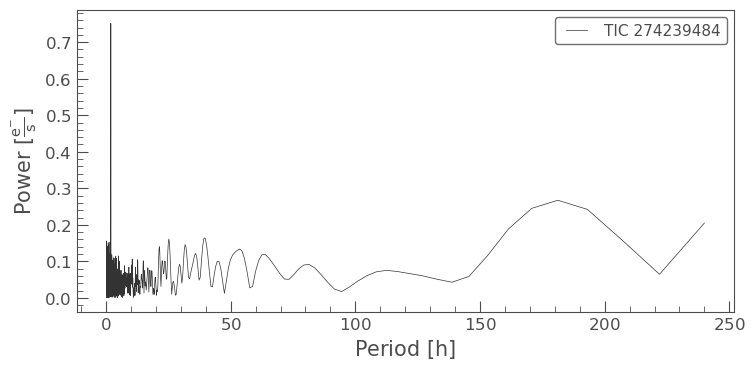

In [8]:
ax = pg.plot(view='Period', unit=u.hour)

D:\conda\lib\site-packages\lightkurve\correctors\sffcorrector.py:43: LightkurveWarning: The SFF correction method is not suitable for use with TESS data, because the spacecraft motion does not proceed along a consistent arc.
  LightkurveWarning)


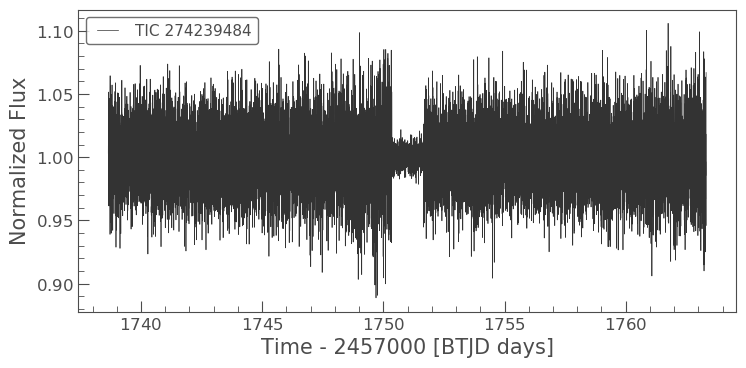

In [9]:
lc = pixels.to_lightcurve().normalize().remove_nans().remove_outliers()
clc = lc.to_corrector("sff").correct(windows=10).remove_outliers().fill_gaps()
clc.plot()

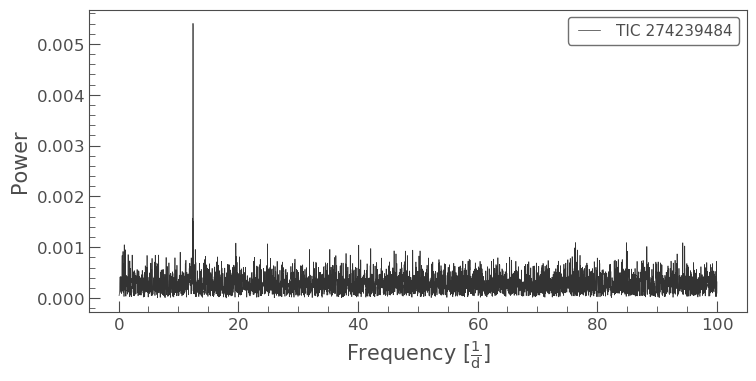

In [11]:
pg_clean = clc.to_periodogram(maximum_frequency=100, minimum_frequency=0.1)
ax = pg_clean.plot()

In [20]:
aperture_small = pixels.create_threshold_mask(threshold=0.25)
aperture_large = pixels.create_threshold_mask(threshold=1)

Text(0.5, 1.0, 'Large aperture')

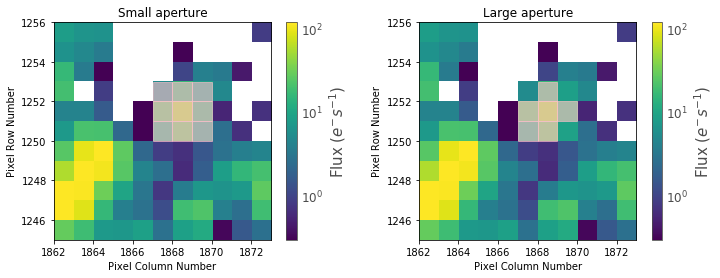

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot pipeline aperture mask
pixels.plot(axs[0], scale='log', aperture_mask=aperture_small)
axs[0].set_title('Small aperture')

# Plot larger aperture mask
pixels.plot(axs[1], scale='log', aperture_mask=aperture_large)
axs[1].set_title('Large aperture')

D:\conda\lib\site-packages\lightkurve\correctors\sffcorrector.py:43: LightkurveWarning: The SFF correction method is not suitable for use with TESS data, because the spacecraft motion does not proceed along a consistent arc.
  LightkurveWarning)
D:\conda\lib\site-packages\lightkurve\correctors\sffcorrector.py:43: LightkurveWarning: The SFF correction method is not suitable for use with TESS data, because the spacecraft motion does not proceed along a consistent arc.
  LightkurveWarning)


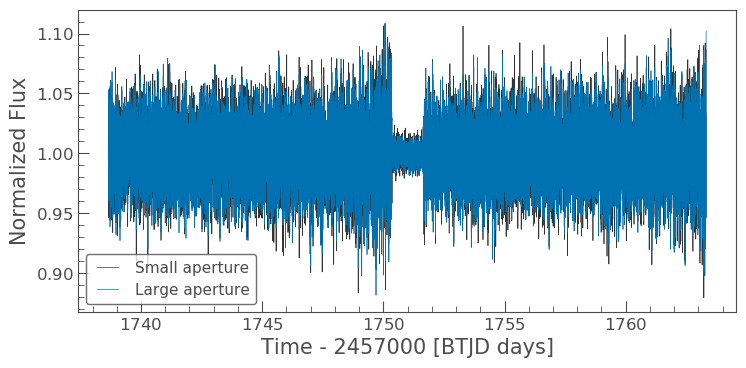

In [22]:
lc_small = pixels.to_lightcurve(aperture_mask=aperture_small).normalize().remove_nans().remove_outliers()
lc_small = lc_small.to_corrector('sff').correct().remove_outliers().fill_gaps()

# Create a light curve with a slightly larger aperture
lc_large = pixels.to_lightcurve(aperture_mask=aperture_large).normalize().remove_nans().remove_outliers()
lc_large = lc_large.to_corrector('sff').correct().remove_outliers().fill_gaps()

ax = lc_small.plot(label='Small aperture')
lc_large.plot(ax=ax, label='Large aperture')


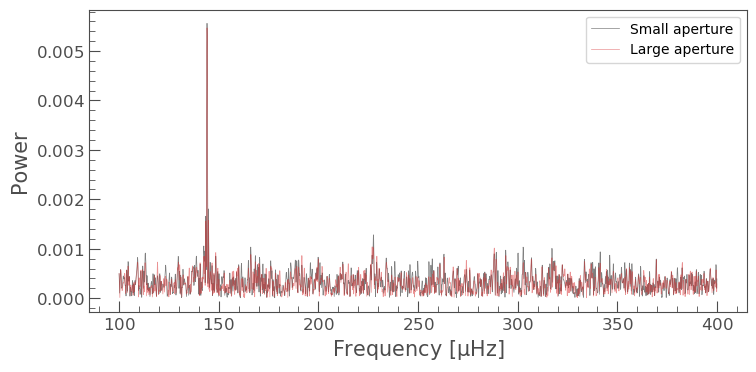

In [23]:
pg_small = lc_small.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=100)
pg_large = lc_large.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=100)


# Plot the periodograms
ax = pg_small.plot(c='k', alpha=0.5, label='Small aperture')
pg_large.plot(ax=ax, c='C3', alpha=0.5, label='Large aperture')

ax.legend()

In [2]:
import lightkurve as lk
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=23).download(cutout_size=(50, 50))

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [3]:
aper = tpf.create_threshold_mask()

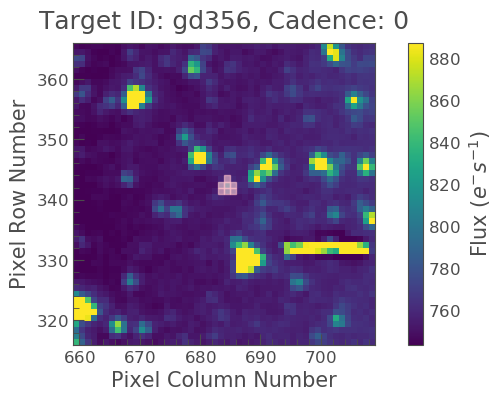

In [4]:
tpf.plot(aperture_mask=aper)

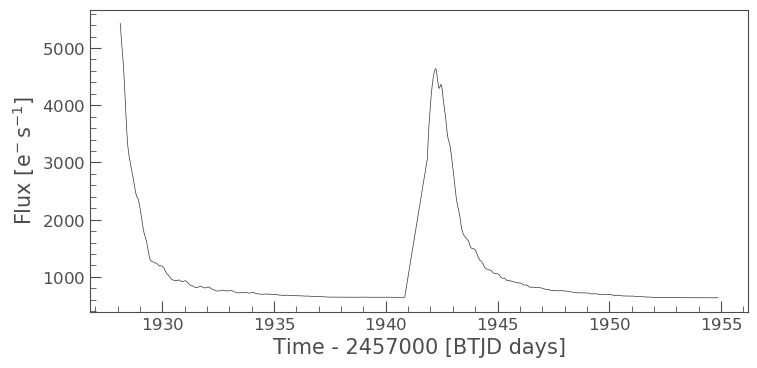

In [6]:
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
raw_lc.plot()

In [7]:
regressors = tpf.flux[:, ~aper]
regressors.shape

(1235, 2493)

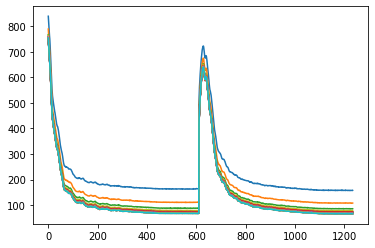

In [9]:
import matplotlib.pyplot as plt
plt.plot(regressors[:, :30])

In [40]:
dm = lk.DesignMatrix(regressors, name='regressors')
dm

regressors DesignMatrix (1235, 2493)

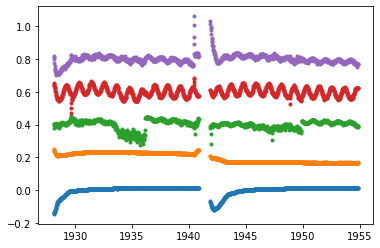

In [41]:
import numpy as np
dm = dm.pca(5)
plt.plot(tpf.time, dm.values + np.arange(5)*0.2, '.')

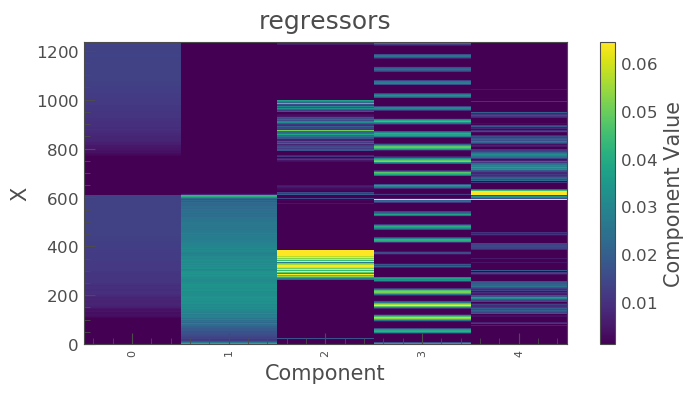

In [13]:
dm.plot()

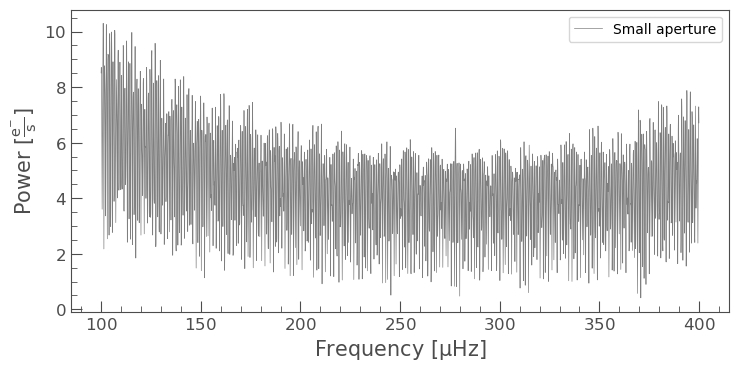

In [16]:
pg_small = raw_lc.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=100)



# Plot the periodograms
ax = pg_small.plot(c='k', alpha=0.5, label='Small aperture')


ax.legend()

In [22]:
np.shape(dm.values[:,3])

(1235,)

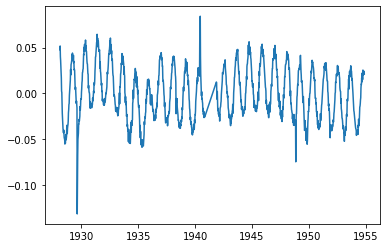

In [23]:
plt.plot(tpf.time, dm.values[:,3])

1.1120737690058513


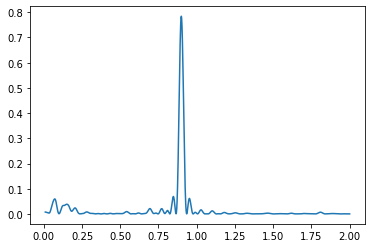

In [58]:
from astropy.timeseries import LombScargle
freq=np.linspace(0.01,2,10000)
power = LombScargle(tpf.time, dm.values[:,3]).power(freq)
plt.plot(freq,power)
idx = np.argmax(power)
print(1/freq[idx])

In [30]:
dmM = dm.pop(3)

AttributeError: 'DesignMatrix' object has no attribute 'pop'

In [32]:
dm = lk.DesignMatrix(regressors, name='regressors')
dm = dm.pca(1)
dm = dm.append_constant()

In [33]:
corrector = lk.RegressionCorrector(raw_lc)

In [34]:
corrected_lc = corrector.correct(dm)

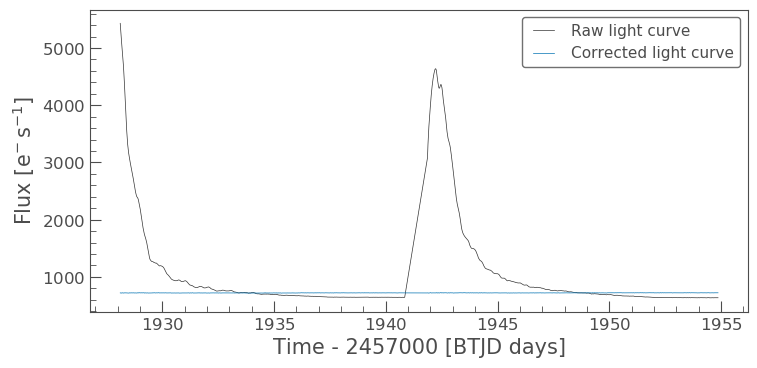

In [35]:
ax = raw_lc.plot(label='Raw light curve')
corrected_lc.plot(ax=ax, label='Corrected light curve')

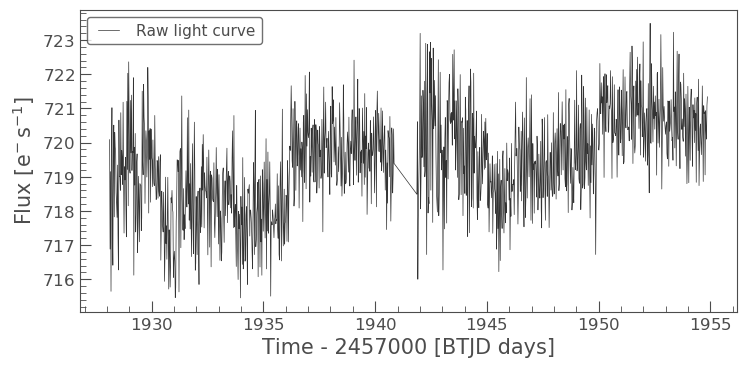

In [37]:
ax = corrected_lc.plot(label='Raw light curve')

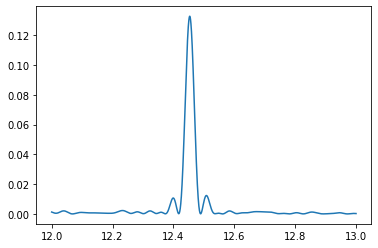

In [45]:
from astropy.timeseries import LombScargle
freq=np.linspace(12,13,10000)
power = LombScargle(tpf.time, corrected_lc.flux).power(freq)
plt.plot(freq,power)

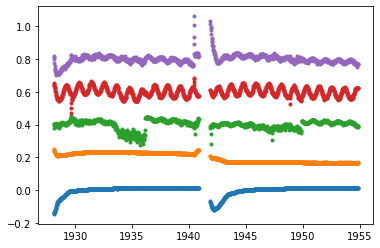

In [42]:
plt.plot(tpf.time, dm.values + np.arange(5)*0.2, '.')

In [38]:
dmn = lk.DesignMatrix(regressors, name='regressors')
dmn = dmn.pca(5)
#dmn = dmn.append_constant()

In [51]:
dmn.split()

TypeError: split() missing 1 required positional argument: 'row_indices'

In [52]:
gTime = np.append(oldTime, tpf.time)
gFlux = np.append(oldFlux, corrected_lc.flux)


0.08030435180678769
12.452625262526253


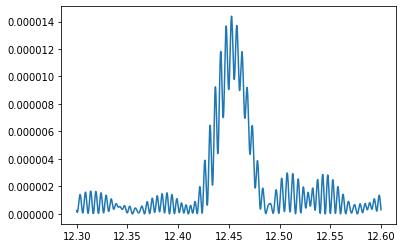

In [62]:
freq=np.linspace(12.3,12.6,10000)
power = LombScargle(gTime, gFlux).power(freq)
plt.plot(freq,power)
idxM = np.argmax(power)
print(1/freq[idxM])
print(freq[idxM])
#12.449990499904999
#12.453300124533001

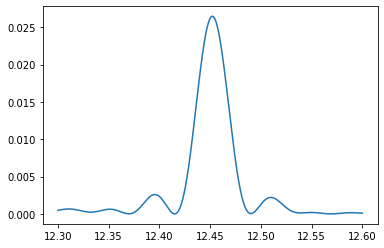

In [55]:
freq=np.linspace(12.3,12.6,10000)
power = LombScargle(oldTime, oldFlux).power(freq)
plt.plot(freq,power)

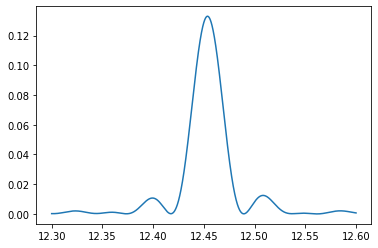

In [56]:
freq=np.linspace(12.3,12.6,10000)
power = LombScargle(tpf.time, corrected_lc.flux).power(freq)
plt.plot(freq,power)

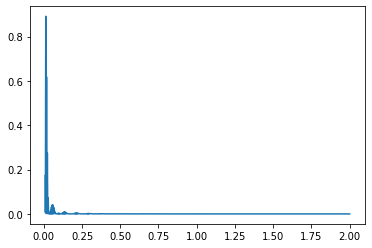

In [59]:
freq=np.linspace(0.01,2,10000)
#freq=np.linspace(12.3,12.6,10000)
power = LombScargle(gTime, gFlux).power(freq)
plt.plot(freq,power)

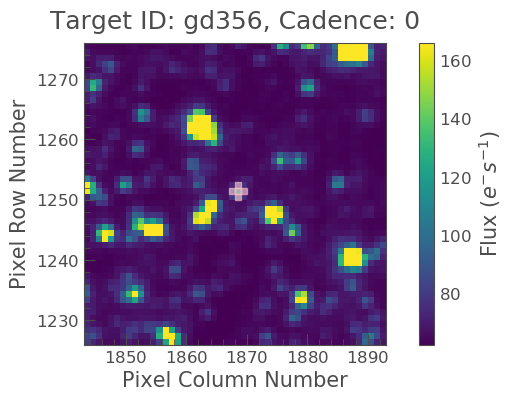

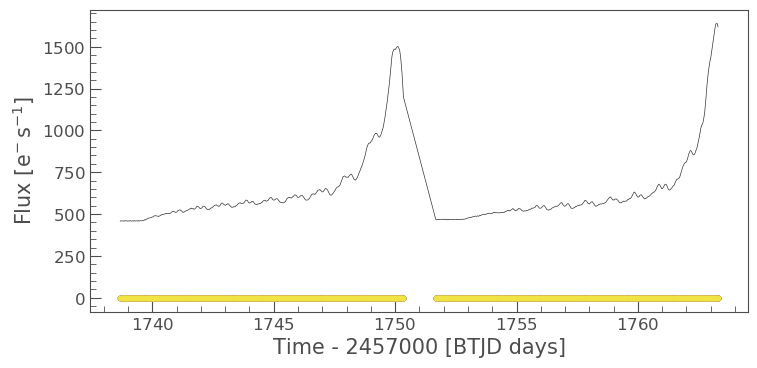

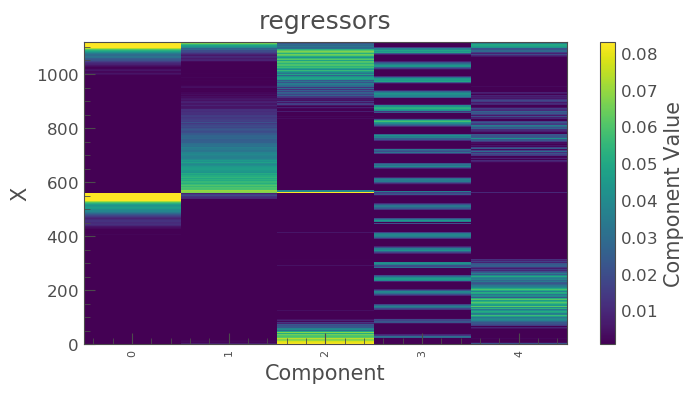

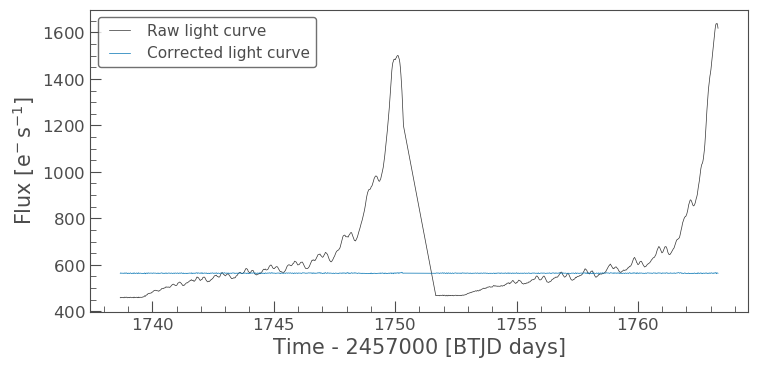

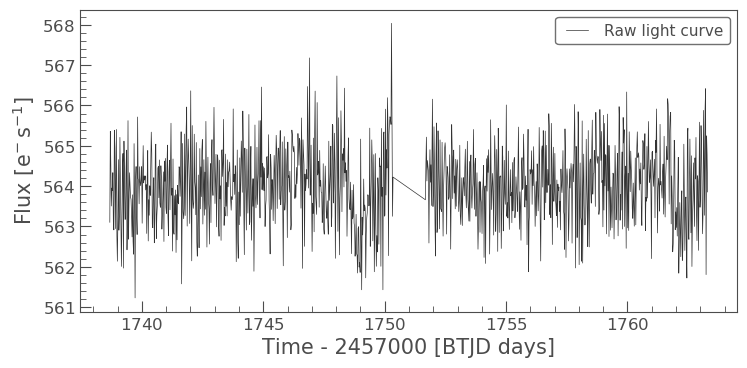

In [74]:
import lightkurve as lk
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=16).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
tpf.plot(aperture_mask=aper)
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
raw_lc.plot()
regressors = tpf.flux[:, ~aper]
regressors.shape
dm = lk.DesignMatrix(regressors, name='regressors')

dm = dm.pca(5)
plt.plot(tpf.time, dm.values + np.arange(5)*0.2, '.')
dm.plot()
dm = dm.append_constant()
corrector = lk.RegressionCorrector(raw_lc)
corrected_lc = corrector.correct(dm)
ax = raw_lc.plot(label='Raw light curve')
corrected_lc.plot(ax=ax, label='Corrected light curve')
ax = corrected_lc.plot(label='Raw light curve')

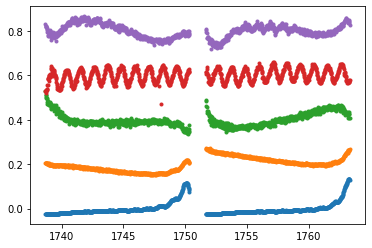

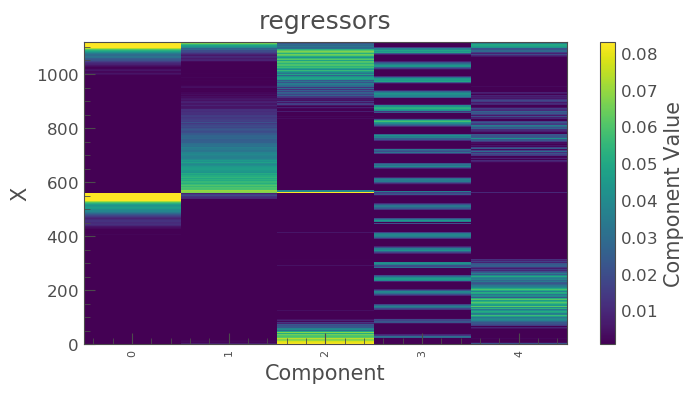

In [75]:

regressors = tpf.flux[:, ~aper]
regressors.shape
dm16 = lk.DesignMatrix(regressors, name='regressors')

dm16 = dm16.pca(5)
plt.plot(tpf.time, dm16.values + np.arange(5)*0.2, '.')
dm16.plot()


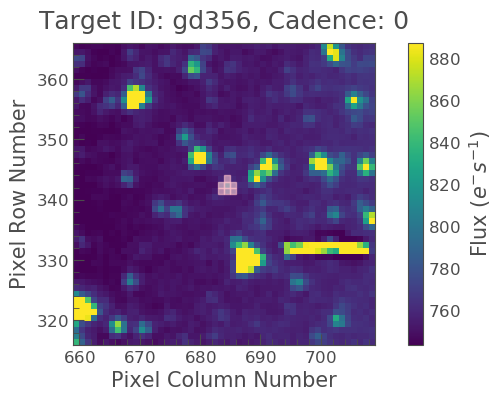

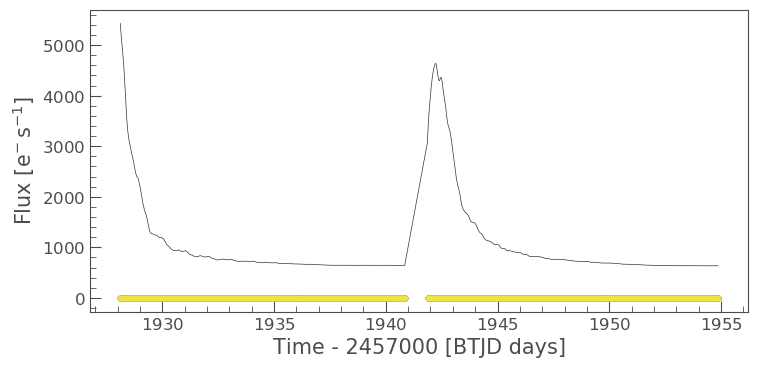

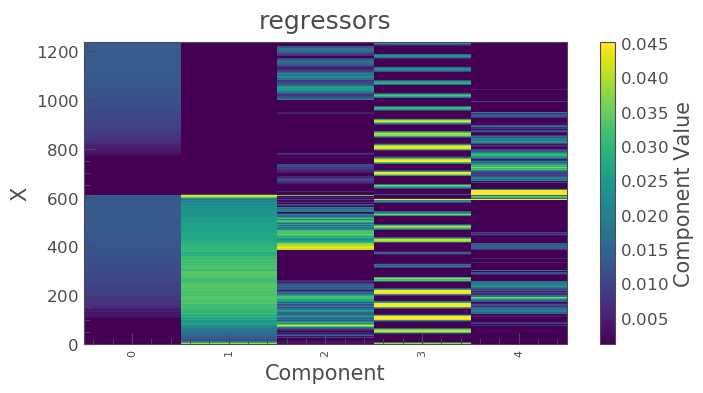

In [77]:
import lightkurve as lk
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=23).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
tpf.plot(aperture_mask=aper)
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
raw_lc.plot()
regressors = tpf.flux[:, ~aper]
regressors.shape
dm = lk.DesignMatrix(regressors, name='regressors')

dm = dm.pca(5)
plt.plot(tpf.time, dm.values + np.arange(5)*0.2, '.')
dm.plot()

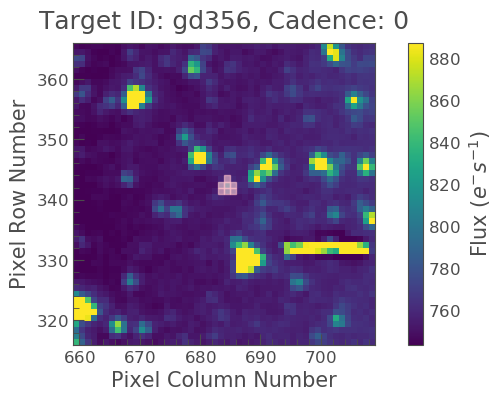

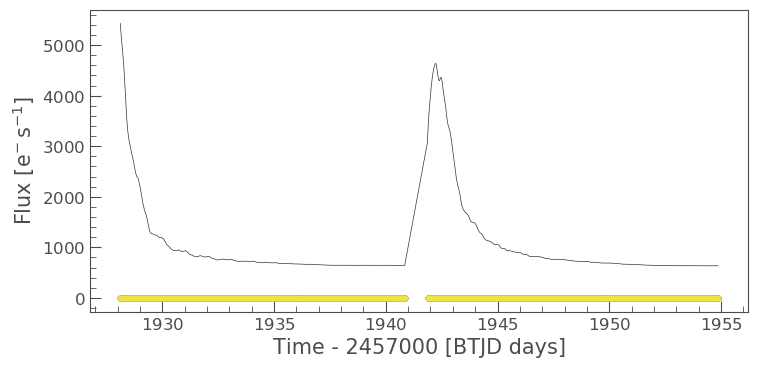

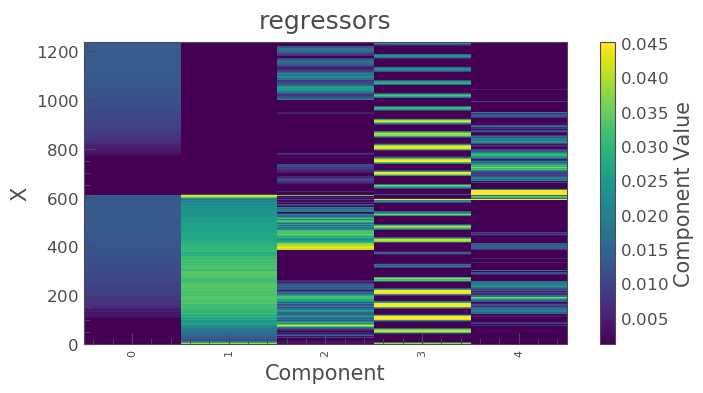

In [80]:
import lightkurve as lk
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=23).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
tpf.plot(aperture_mask=aper)
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
raw_lc.plot()
regressors = tpf.flux[:, ~aper]
regressors.shape
dm = lk.DesignMatrix(regressors, name='regressors')

dm = dm.pca(5)
plt.plot(tpf.time, dm.values + np.arange(5)*0.2, '.')
dm.plot()

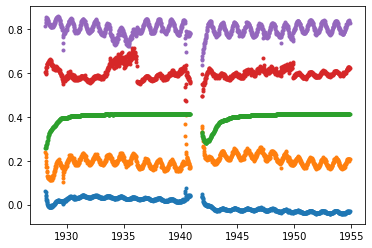

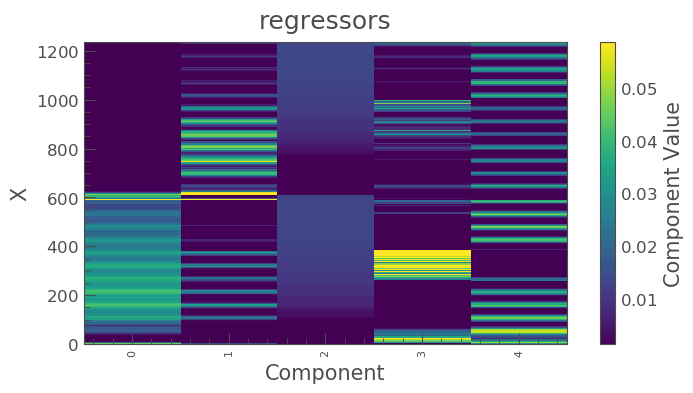

In [89]:
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=23).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
regressors = tpf.flux[:, ~aper]
regressors.shape
dm23 = lk.DesignMatrix(regressors, name='regressors')

dm23 = dm.pca(5)
plt.plot(tpf.time, dm23.values + np.arange(5)*0.2, '.')
dm23.plot()


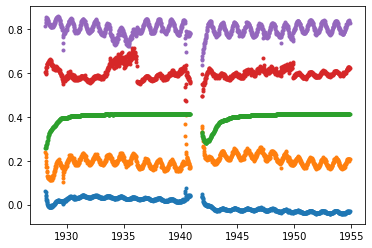

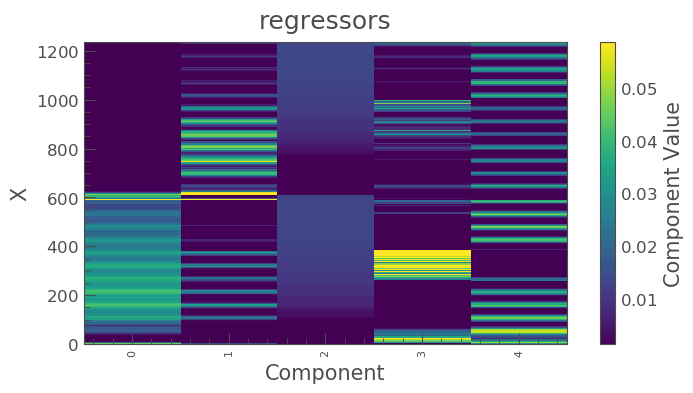

In [90]:
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=23).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
regressors = tpf.flux[:, ~aper]
regressors.shape
dm23 = lk.DesignMatrix(regressors, name='regressors')

dm23 = dm.pca(5)
plt.plot(tpf.time, dm23.values + np.arange(5)*0.2, '.')
dm23.plot()


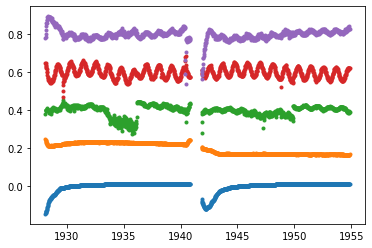

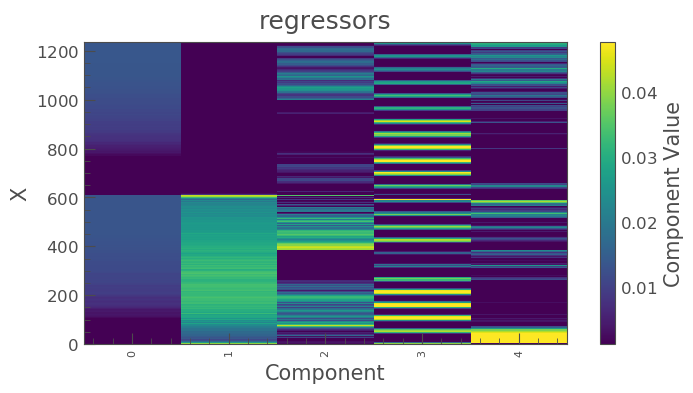

In [91]:
import lightkurve as lk
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=23).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
#tpf.plot(aperture_mask=aper)
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
#raw_lc.plot()
regressors = tpf.flux[:, ~aper]
regressors.shape
dm = lk.DesignMatrix(regressors, name='regressors')

dm = dm.pca(5)
plt.plot(tpf.time, dm.values + np.arange(5)*0.2, '.')
dm.plot()

In [94]:
dm23 = dm
time23 = tpf.time

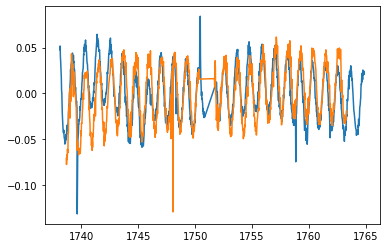

In [100]:
plt.plot(time23-190,dm23.values[:,3])
plt.plot(time16,dm16.values[:,3])

In [95]:
import lightkurve as lk
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=16).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
time16 = tpf.time

In [98]:
np.mean(time23)-np.mean(time16)

190.50697441909188

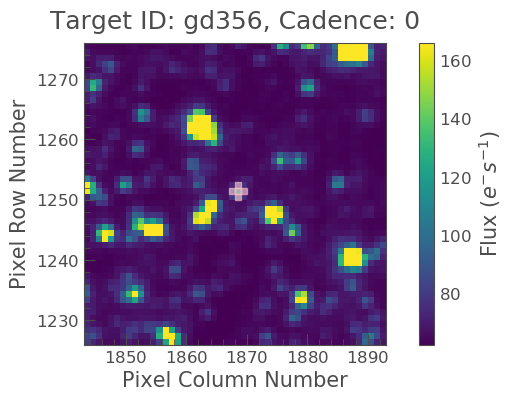

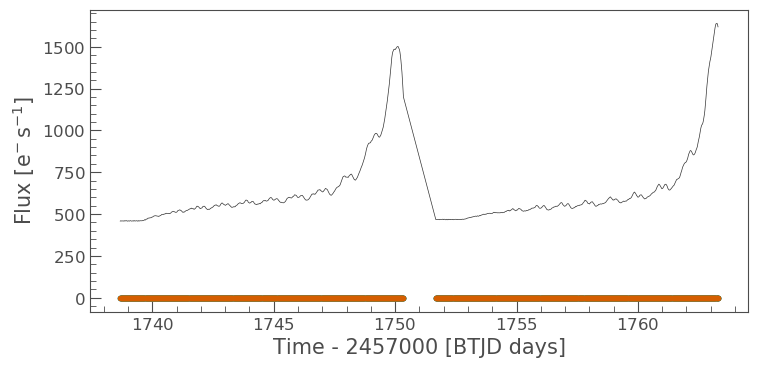

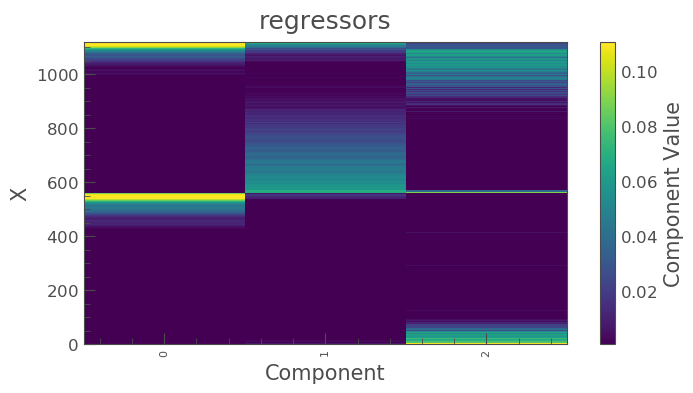

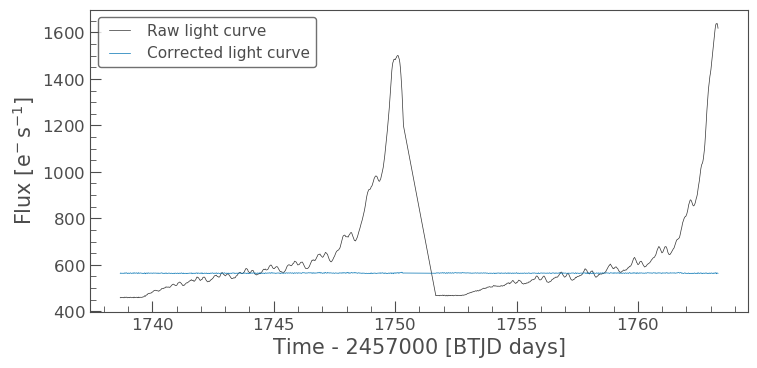

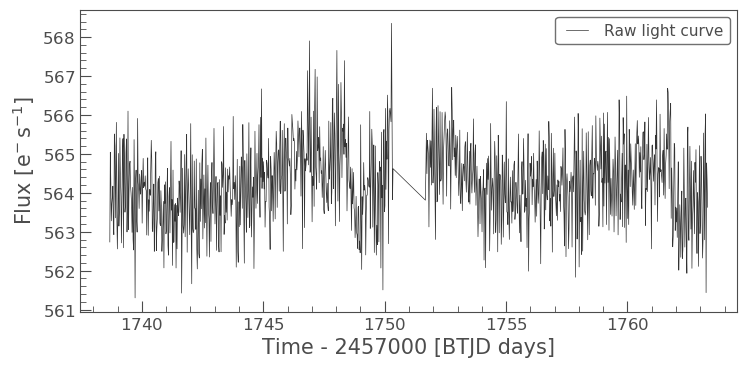

In [107]:
import lightkurve as lk
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=16).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
tpf.plot(aperture_mask=aper)
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
raw_lc.plot()
regressors = tpf.flux[:, ~aper]
regressors.shape
dm = lk.DesignMatrix(regressors, name='regressors')

dm = dm.pca(3)
plt.plot(tpf.time, dm.values + np.arange(3)*0.2, '.')
dm.plot()
dm = dm.append_constant()
corrector = lk.RegressionCorrector(raw_lc)
corrected_lc16 = corrector.correct(dm)
ax = raw_lc.plot(label='Raw light curve')
corrected_lc16.plot(ax=ax, label='Corrected light curve')
ax = corrected_lc16.plot(label='Raw light curve')

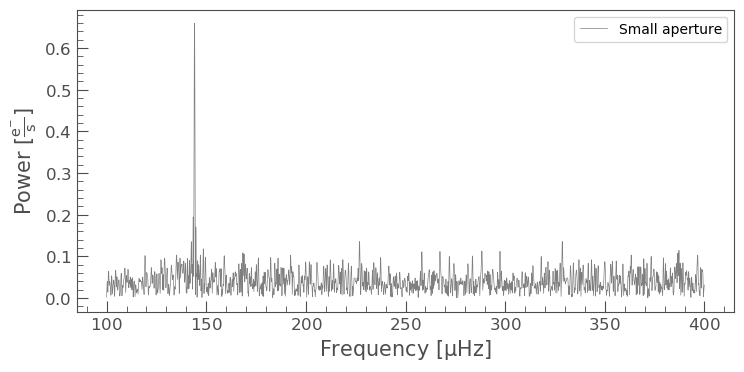

In [104]:

pg_small = corrected_lc.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=100)



# Plot the periodograms
ax = pg_small.plot(c='k', alpha=0.5, label='Small aperture')


ax.legend()

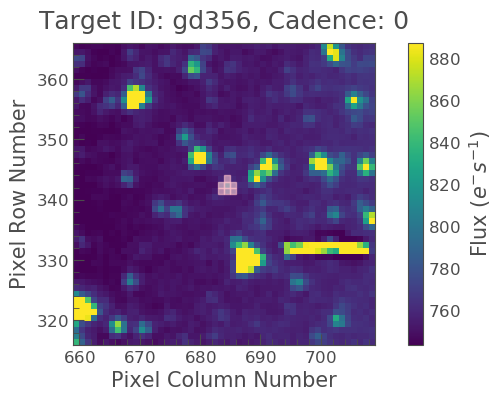

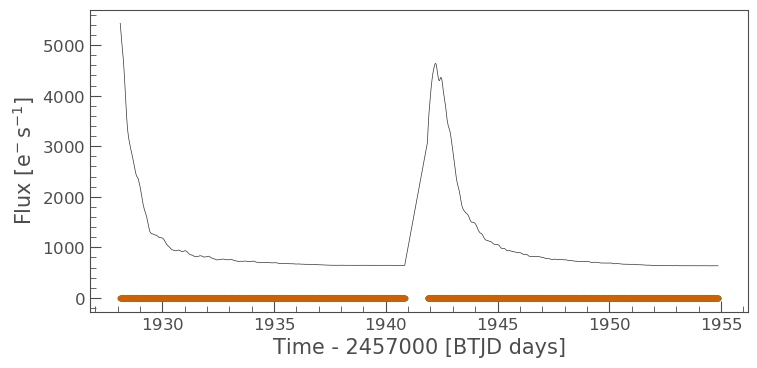

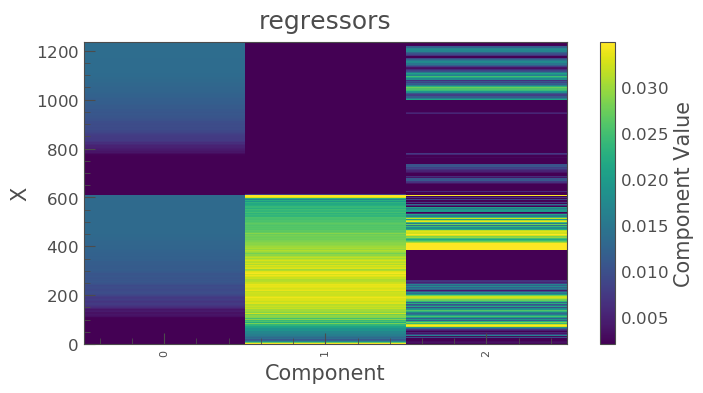

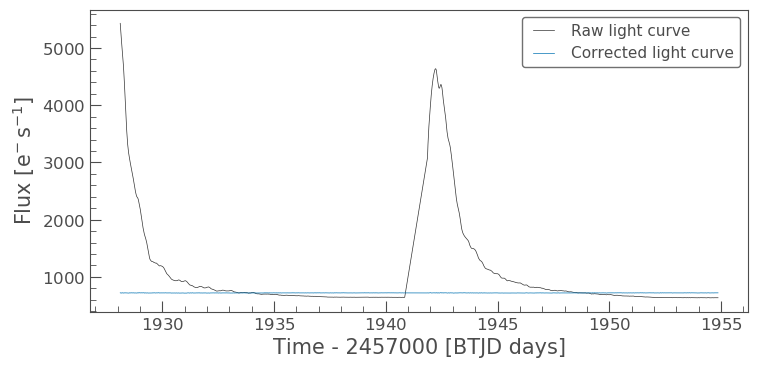

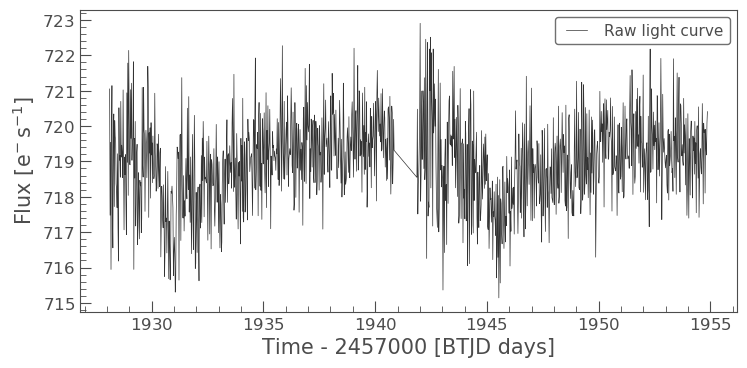

In [108]:
import lightkurve as lk
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=23).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
tpf.plot(aperture_mask=aper)
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
raw_lc.plot()
regressors = tpf.flux[:, ~aper]
regressors.shape
dm = lk.DesignMatrix(regressors, name='regressors')

dm = dm.pca(3)
plt.plot(tpf.time, dm.values + np.arange(3)*0.2, '.')
dm.plot()
dm = dm.append_constant()
corrector = lk.RegressionCorrector(raw_lc)
corrected_lc23 = corrector.correct(dm)
ax = raw_lc.plot(label='Raw light curve')
corrected_lc23.plot(ax=ax, label='Corrected light curve')
ax = corrected_lc23.plot(label='Raw light curve')

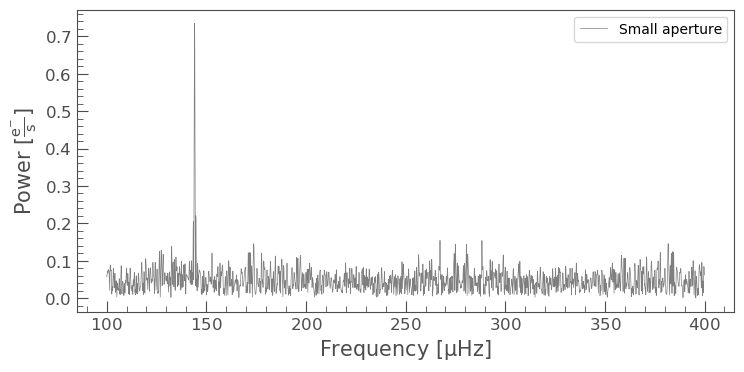

In [106]:

pg_small = corrected_lc.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=100)



# Plot the periodograms
ax = pg_small.plot(c='k', alpha=0.5, label='Small aperture')


ax.legend()

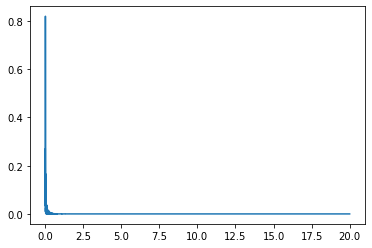

In [110]:
freq=np.linspace(0.01,20,10000)
f23 = corrected_lc23.flux
t23 = corrected_lc23.time
f16 = corrected_lc16.flux
t16 = corrected_lc16.time
gt = np.append(t16,t23)
gf = np.append(f16,f23)
power = LombScargle(gt,gf).power(freq)
plt.plot(freq,power)

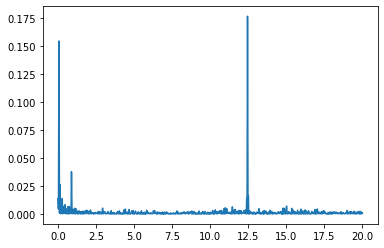

In [113]:
#plt.plot(t23,f23)
power = LombScargle(t23,f23).power(freq)
plt.plot(freq,power)

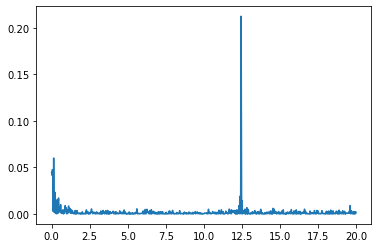

In [114]:
power = LombScargle(t16,f16).power(freq)
plt.plot(freq,power)

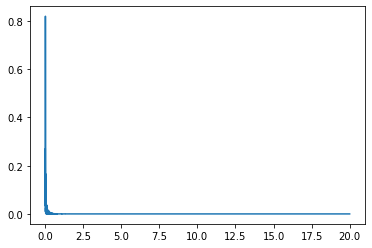

In [115]:
gt = np.append(t16,t23)
gf = np.append(f16,f23)
power = LombScargle(gt,gf).power(freq)
plt.plot(freq,power)

(12.4, 12.6)

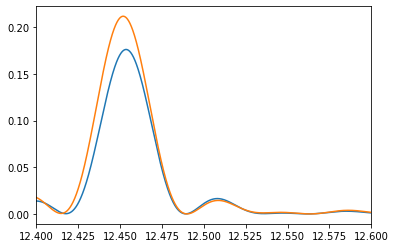

In [126]:
freq= np.linspace(12,13,10000)
power = LombScargle(t23,f23).power(freq)
plt.plot(freq,power)
power = LombScargle(t16,f16).power(freq)
plt.plot(freq,power)
plt.xlim(12.4,12.6)

12.453945394539454

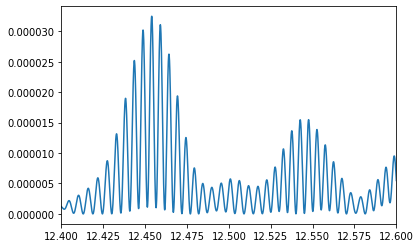

In [127]:
gt = np.append(t16,t23)
gf = np.append(f16,f23)
power = LombScargle(gt,gf).power(freq)
plt.plot(freq,power)
plt.xlim(12.4,12.6)
freq[np.argmax(power)]

(0, 1)

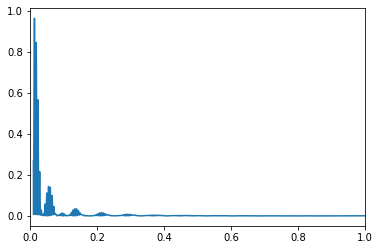

In [124]:
freq= np.linspace(0.01,13,100000)
power = LombScargle(gt,gf).power(freq)
plt.plot(freq,power)
plt.xlim(0,1)

In [129]:
(1/12.453945394539454)*24*60

115.6260088173649

In [130]:
1/12.453945394539454

0.08029583945650341

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!
1118


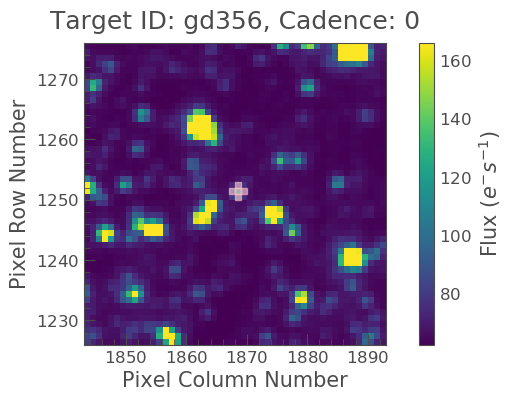

In [2]:
import lightkurve as lk
target = 'gd356'  # Boyajian's Star
tpf = lk.search_tesscut(target, sector=16).download(cutout_size=(50, 50))
aper = tpf.create_threshold_mask()
tpf.plot(aperture_mask=aper)
raw_lc = tpf.to_lightcurve(aperture_mask=aper)
print(raw_lc.time)

In [3]:
print(raw_lc.time)

[1738.67633057 1738.69720459 1738.71801758 ... 1763.25939941 1763.2802124
 1763.30108643]


In [ ]:
raw_lc.plot()
regressors = tpf.flux[:, ~aper]
regressors.shape
dm = lk.DesignMatrix(regressors, name='regressors')

dm = dm.pca(3)
plt.plot(tpf.time, dm.values + np.arange(3)*0.2, '.')
dm.plot()
dm = dm.append_constant()
corrector = lk.RegressionCorrector(raw_lc)
corrected_lc16 = corrector.correct(dm)
ax = raw_lc.plot(label='Raw light curve')
corrected_lc16.plot(ax=ax, label='Corrected light curve')
ax = corrected_lc16.plot(label='Raw light curve')

In [ ]:
0.002

In [ ]:
0.02087

In [4]:
24*60*(raw_lc.time[1]-raw_lc.time[2])

-29.970703125

# Fits

In [2]:

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [1]:
with fits.open('tessLCSec23.fits', mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

NameError: name 'fits' is not defined

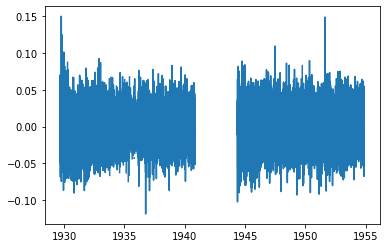

In [8]:
plt.plot(tess_bjds,(pdcsap_fluxes/np.nanmean(pdcsap_fluxes))-1)

In [5]:
with fits.open('dvt.fits', mode="readonly") as hdulist:

    initialFlux = hdulist[1].data['LC_INIT']
    initialTime = hdulist[1].data['TIME']
    initialError = hdulist[1].data['LC_INIT_ERR']

(-0.05, 0.05)

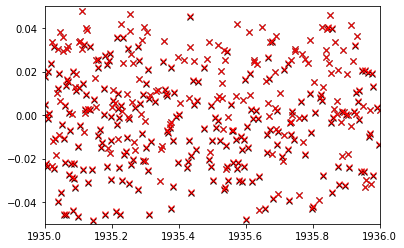

In [14]:
plt.plot(tess_bjds,(pdcsap_fluxes/np.nanmean(pdcsap_fluxes))-1, 'kx')
plt.plot(initialTime,initialFlux, 'rx')
plt.xlim(1935,1936)
plt.ylim(-0.05,0.05)


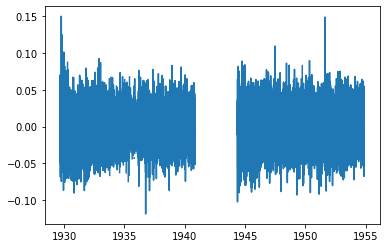

In [12]:
pdcsap_fluxesNorm = (pdcsap_fluxes/np.nanmean(pdcsap_fluxes))-1
plt.plot(tess_bjds,pdcsap_fluxesNorm)

In [19]:
nan_indx = np.argwhere(np.isnan(pdcsap_fluxesNorm))
len(nan_indx)

4428

In [21]:
pdcsap_fluxesNormC = []
timeN = []
for count, el in enumerate(pdcsap_fluxesNorm):
    if np.isnan(el)==False:
        pdcsap_fluxesNormC.append(el)
        timeTmp = tess_bjds[count]
        timeN.append(timeTmp)

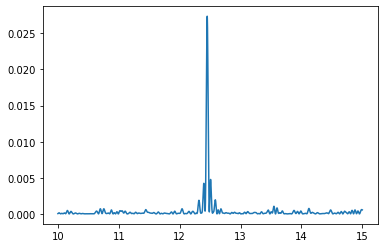

In [38]:
freq = np.linspace(10,15,10000)
power = LombScargle(timeN,pdcsap_fluxesNormC).power(freq)
plt.plot(freq,power)

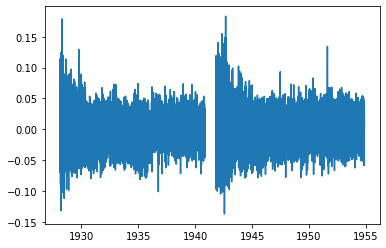

In [24]:
sap_fluxesNorm = (sap_fluxes/np.nanmean(sap_fluxes))-1
plt.plot(tess_bjds,sap_fluxesNorm)

In [33]:
sap_fluxesNormC = []
timeNs = []
for count, el in enumerate(sap_fluxesNorm):
    if np.isnan(el)==False:
        sap_fluxesNormC.append(el)
        timeTmp = tess_bjds[count]
        timeNs.append(timeTmp)

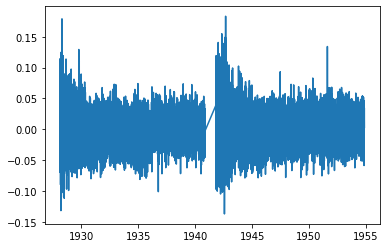

In [34]:
plt.plot(timeNs,sap_fluxesNormC)

In [28]:
print(len(sap_fluxesNormC), len(timeN))

18558 14851


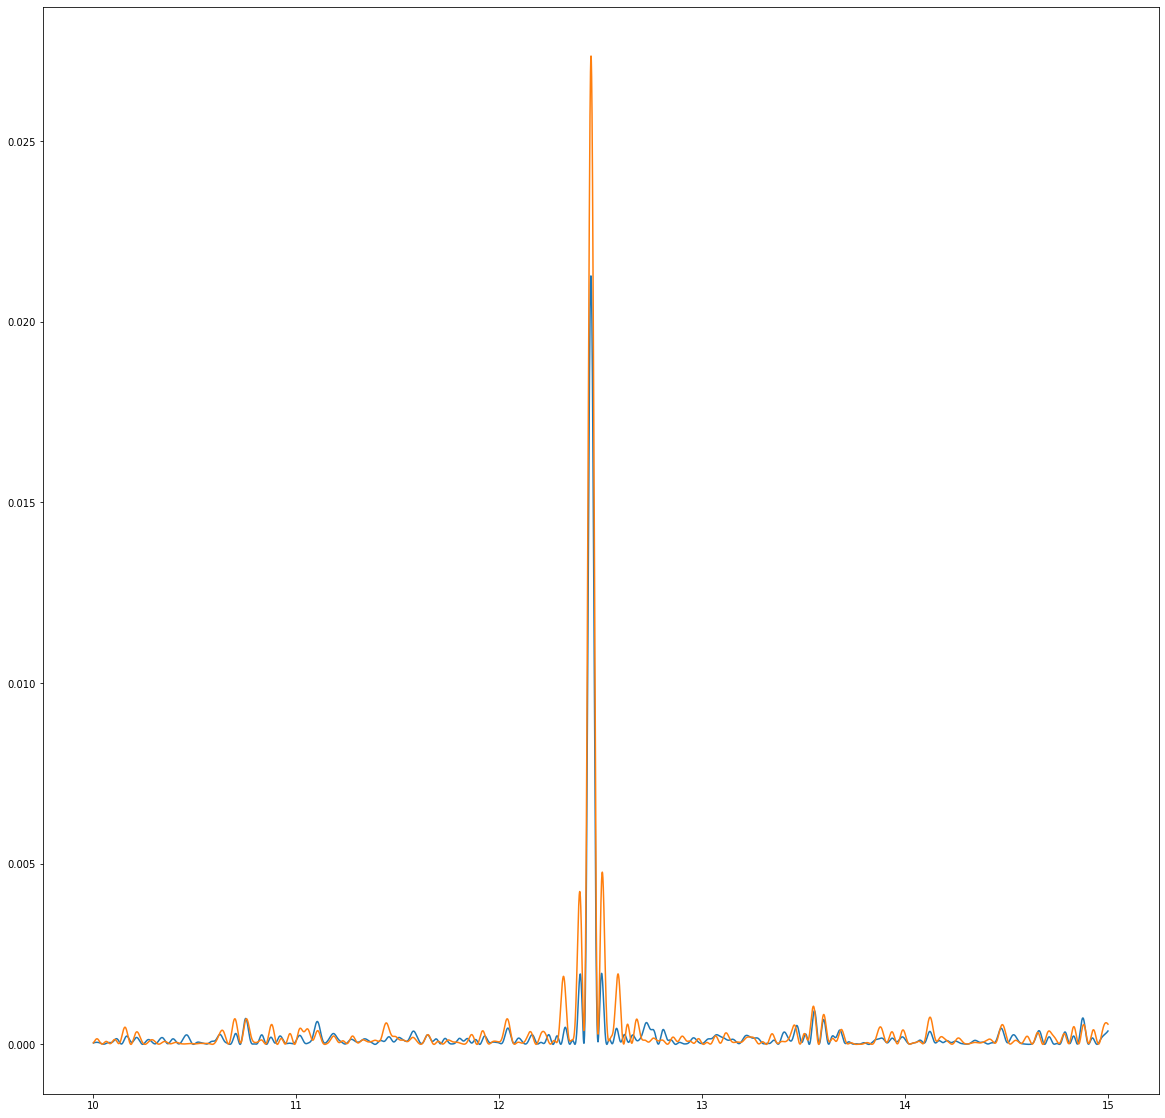

In [40]:
freq = np.linspace(10,15,10000)
powers = LombScargle(timeNs,sap_fluxesNormC).power(freq)
plt.figure(figsize=(20,20))
plt.plot(freq,powers)
plt.plot(freq,power)

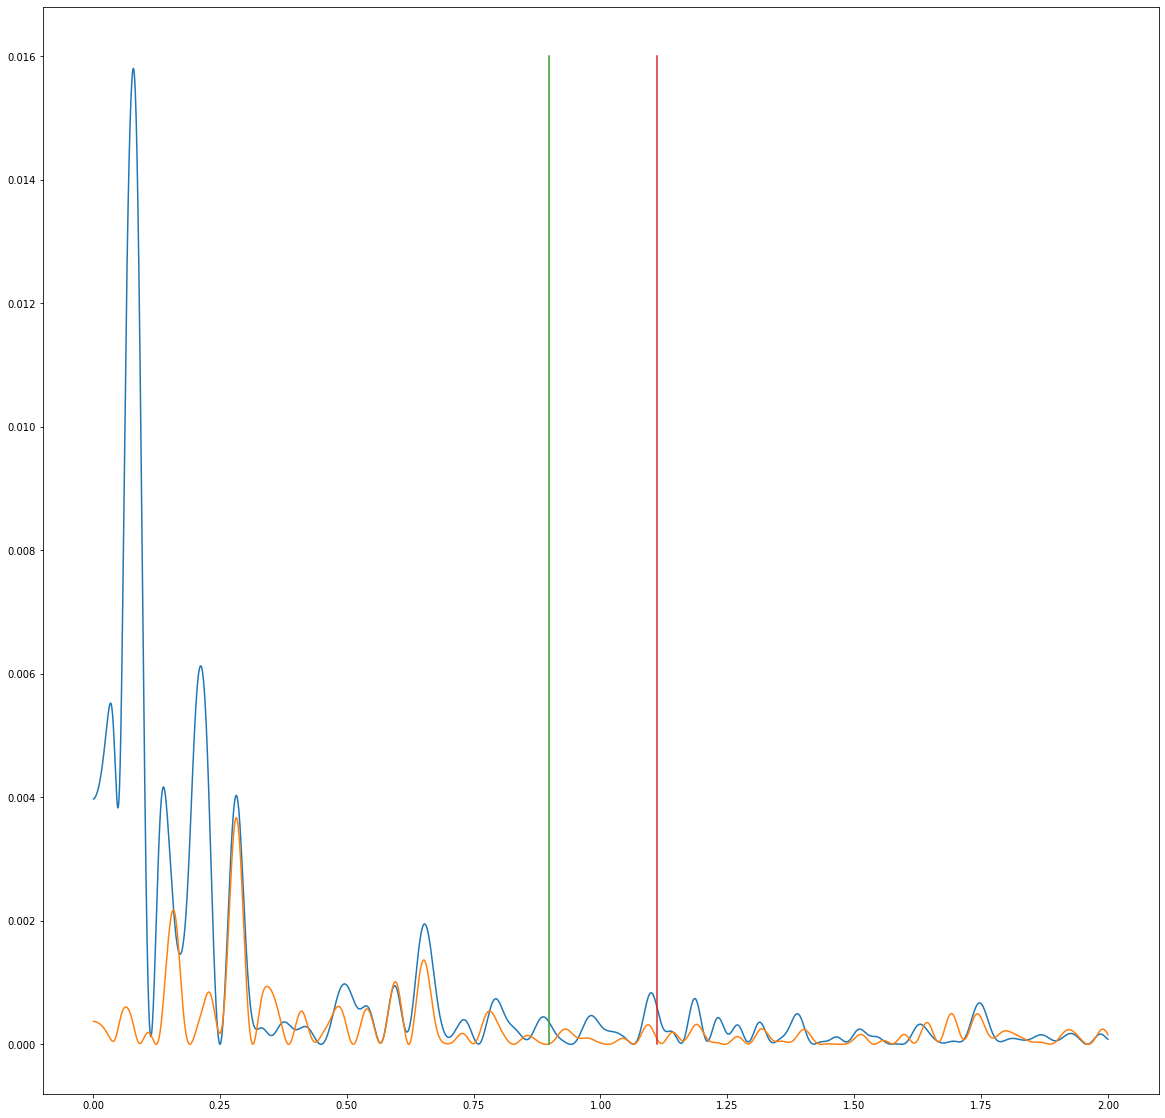

In [43]:
freq = np.linspace(0.001,2,10000)
power = LombScargle(timeN,pdcsap_fluxesNormC).power(freq)
powers = LombScargle(timeNs,sap_fluxesNormC).power(freq)
plt.figure(figsize=(20,20))
plt.plot(freq,powers)
plt.plot(freq,power)
plt.plot([1/1.1120737690058513, 1/1.1120737690058513],[0,0.016])
plt.plot([1.1120737690058513, 1.1120737690058513],[0,0.016])

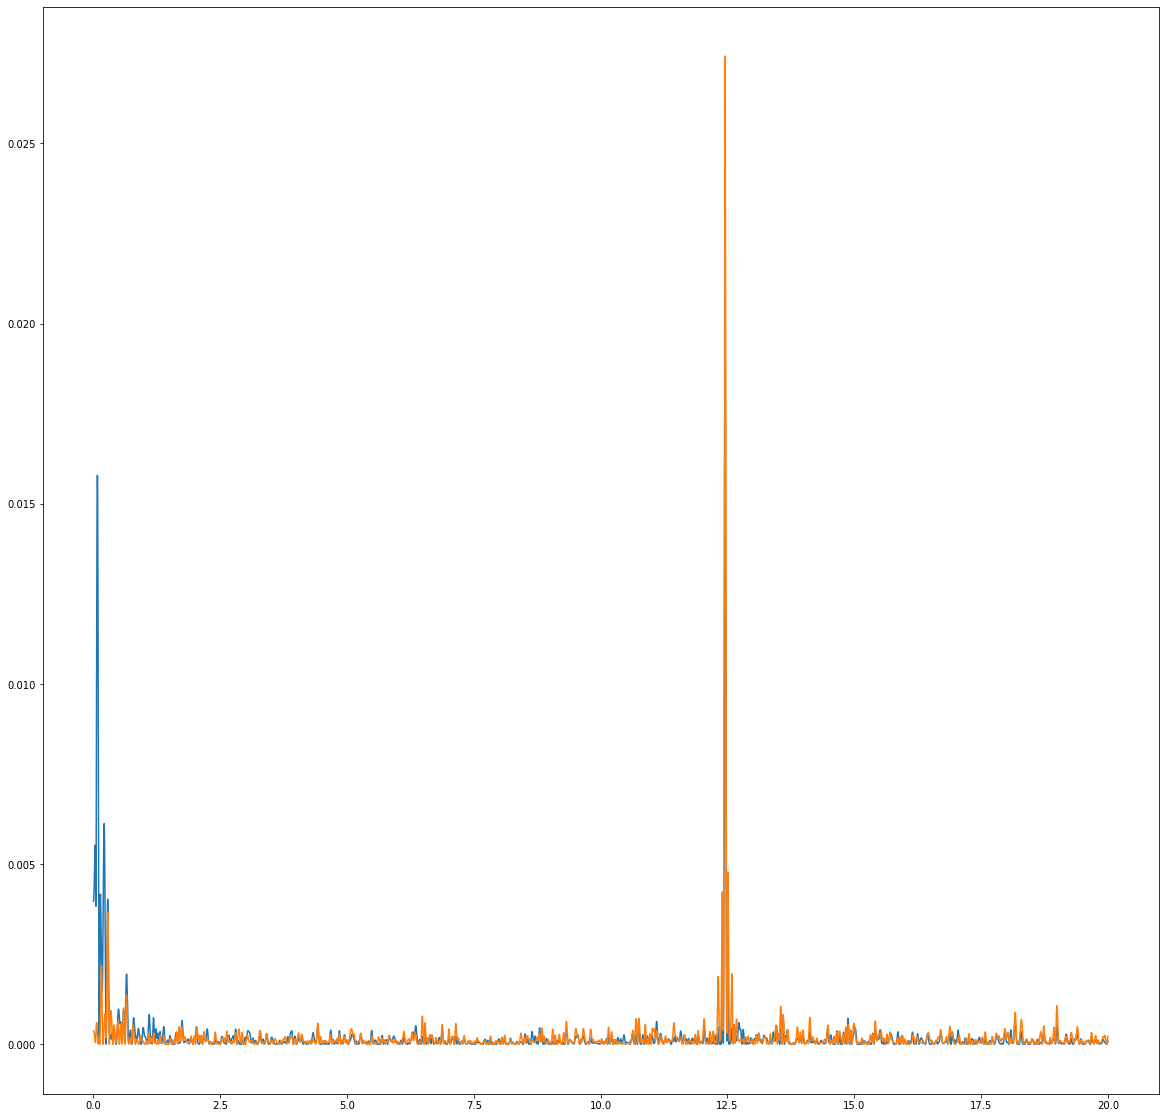

In [44]:
freq = np.linspace(0.001,20,10000)
power = LombScargle(timeN,pdcsap_fluxesNormC).power(freq)
powers = LombScargle(timeNs,sap_fluxesNormC).power(freq)
plt.figure(figsize=(20,20))
plt.plot(freq,powers)
plt.plot(freq,power)

In [45]:
with fits.open('tessLCSec16.fits', mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    
pdcsap_fluxesNorm16 = (pdcsap_fluxes/np.nanmean(pdcsap_fluxes))-1
sap_fluxesNorm16 = (sap_fluxes/np.nanmean(sap_fluxes))-1

pdcsap_fluxesNormC16 = []
timeN16 = []
for count, el in enumerate(pdcsap_fluxesNorm16):
    if np.isnan(el)==False:
        pdcsap_fluxesNormC16.append(el)
        timeTmp = tess_bjds[count]
        timeN16.append(timeTmp)
        
sap_fluxesNormC16 = []
timeNS16 = []
for count, el in enumerate(sap_fluxesNorm16):
    if np.isnan(el)==False:
        sap_fluxesNormC16.append(el)
        timeTmp = tess_bjds[count]
        timeNS16.append(timeTmp)

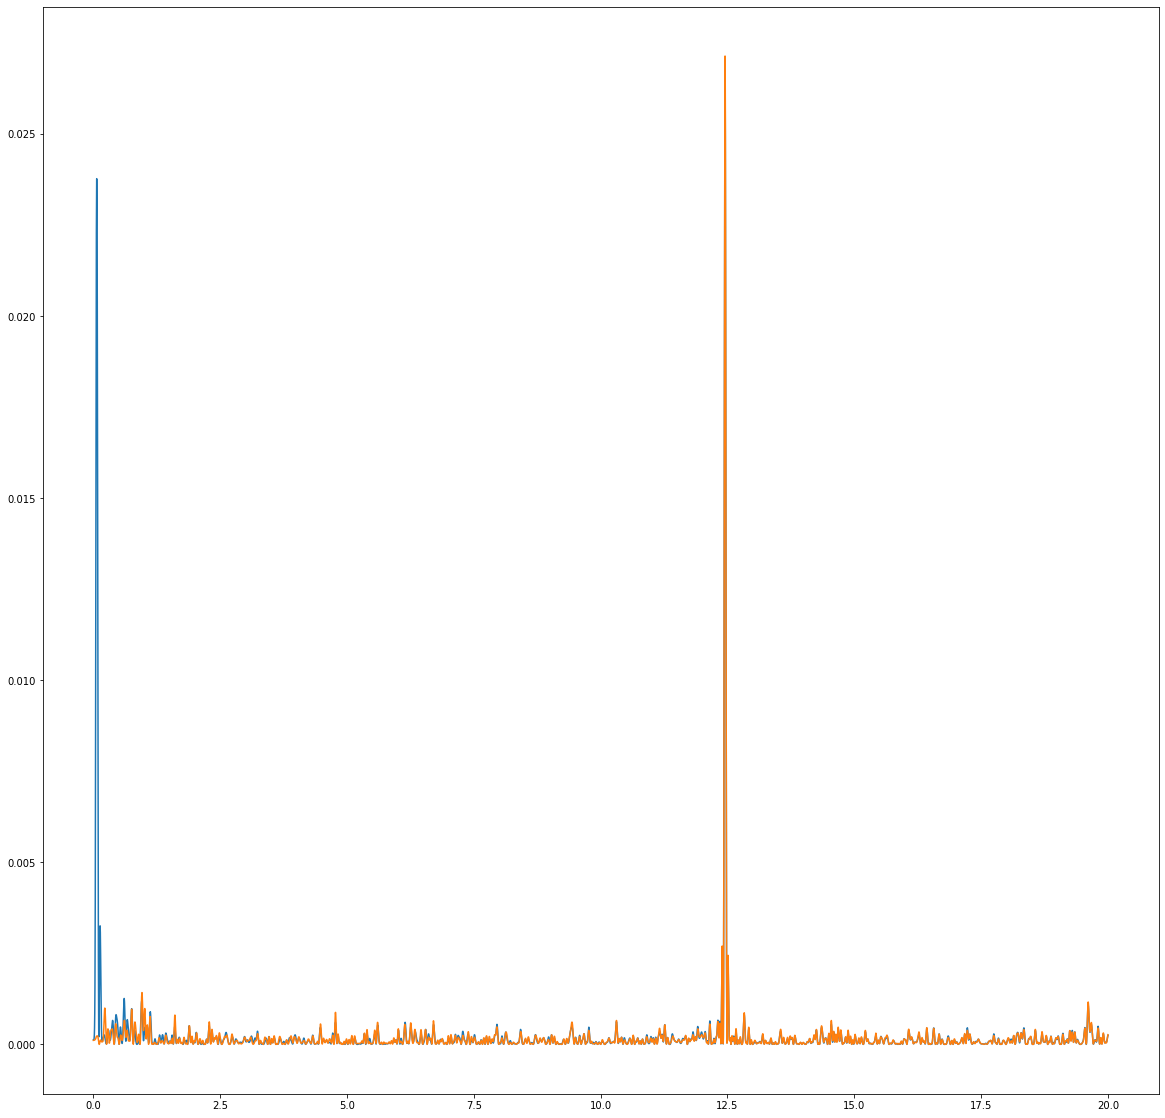

In [46]:
freq = np.linspace(0.001,20,10000)
power = LombScargle(timeN16,pdcsap_fluxesNormC16).power(freq)
powers = LombScargle(timeNS16,sap_fluxesNormC16).power(freq)
plt.figure(figsize=(20,20))
plt.plot(freq,powers)
plt.plot(freq,power)

In [50]:
totFS = np.append(sap_fluxesNormC16,sap_fluxesNormC)
totFP = np.append(pdcsap_fluxesNormC16,pdcsap_fluxesNormC)
totTS = np.append(timeNS16, timeNs)
totTP = np.append(timeN16, timeN)


In [51]:
print(np.shape(totFS),np.shape(totFP),np.shape(totTS),np.shape(totTP))
print(np.shape(pdcsap_fluxesNormC16),np.shape(timeN16), np.shape(pdcsap_fluxesNormC),np.shape(timeN16))

(35370,) (31663,) (35370,) (31663,)
(16812,) (16812,) (14851,) (16812,)


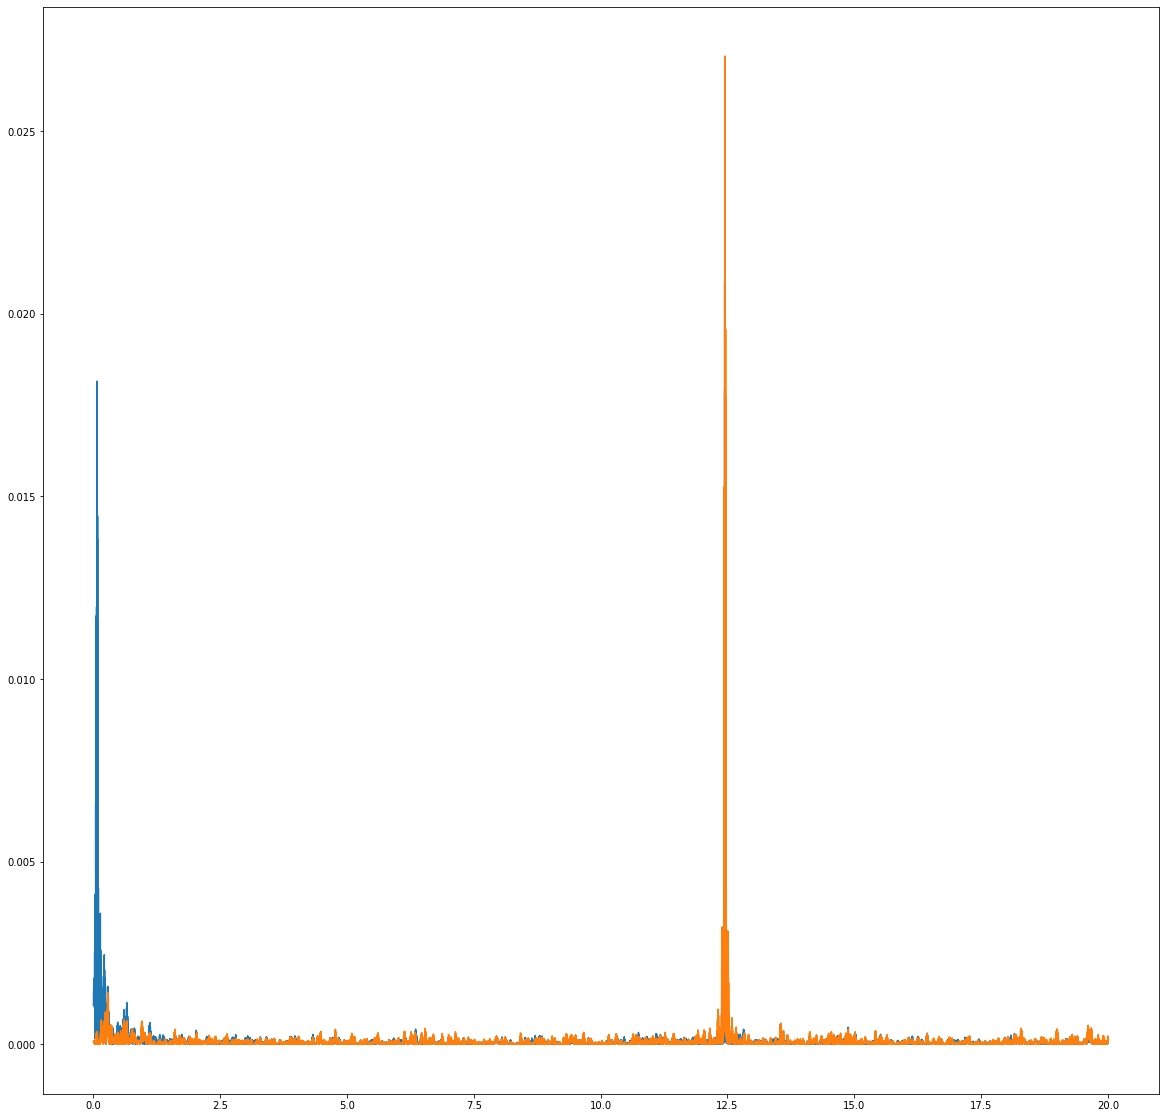

In [52]:
freq = np.linspace(0.001,20,10000)
power = LombScargle(totTP,totFP).power(freq)
powers = LombScargle(totTS, totFS).power(freq)
plt.figure(figsize=(20,20))
plt.plot(freq,powers)
plt.plot(freq,power)

13.704037201958776


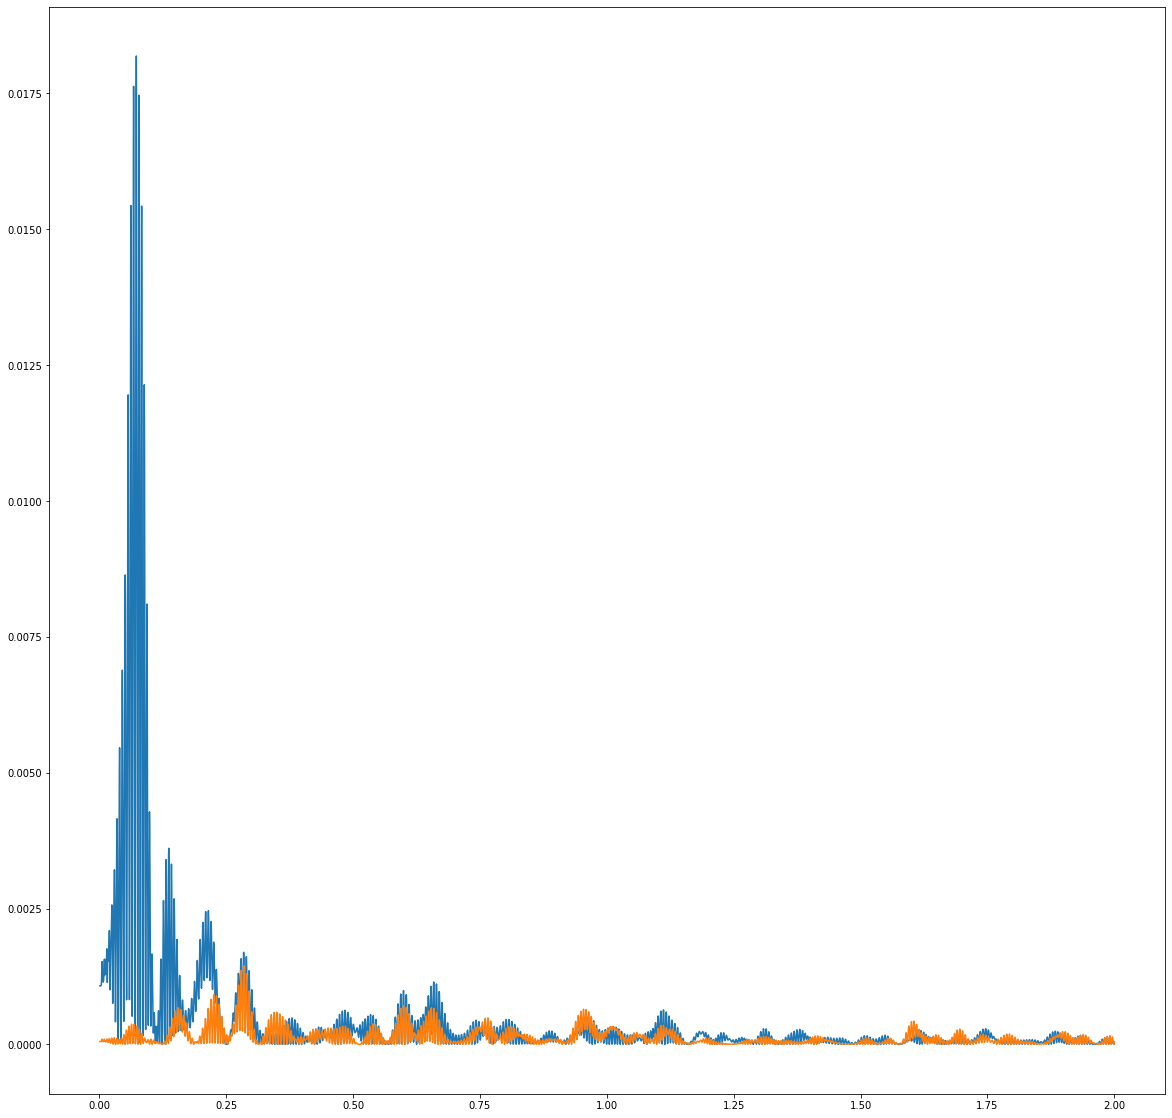

In [54]:

freq = np.linspace(0.001,2,10000)
power = LombScargle(totTP,totFP).power(freq)
powers = LombScargle(totTS, totFS).power(freq)
plt.figure(figsize=(20,20))
plt.plot(freq,powers)
plt.plot(freq,power)
print(1/freq[np.argmax(powers)])

0.0802984187660111


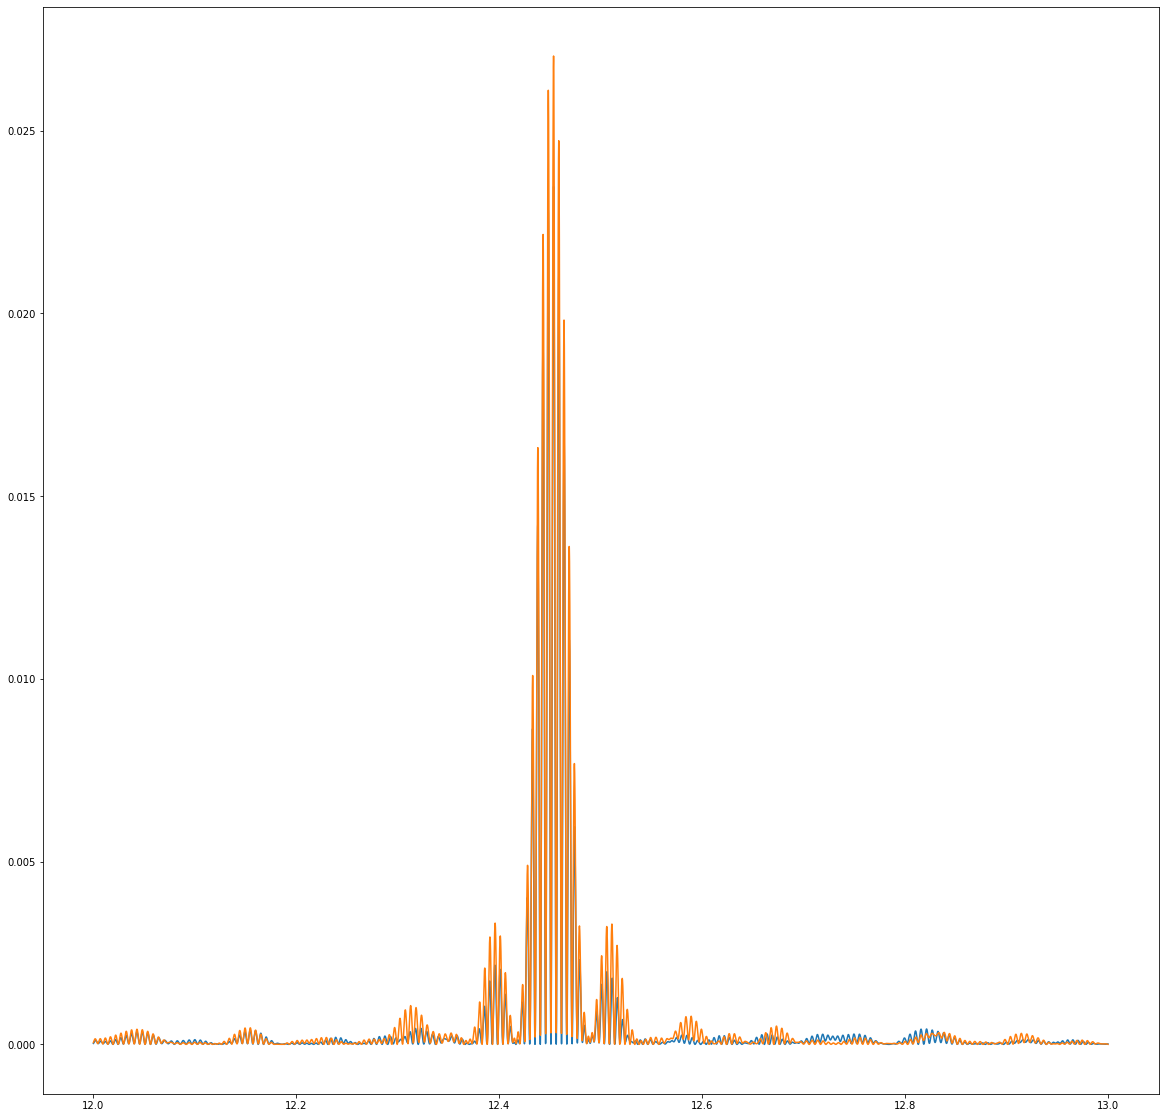

In [58]:

freq = np.linspace(12,13,10000)
power = LombScargle(totTP,totFP).power(freq)
powers = LombScargle(totTS, totFS).power(freq)
plt.figure(figsize=(20,20))
plt.plot(freq,powers)
plt.plot(freq,power)
print(1/freq[np.argmax(powers)])

In [ ]:
np.mean(arr.reshape(-1, 3), axis=1)

In [ ]:
totFS = np.append(sap_fluxesNormC16,sap_fluxesNormC)
totFP = np.append(pdcsap_fluxesNormC16,pdcsap_fluxesNormC)
totTS = np.append(timeNS16, timeNs)
totTP = np.append(timeN16, timeN)


In [60]:
31663

4523.285714285715

In [66]:
mean16F = []
mean16T = []
        
for i in range(16800):
    mean16F.append(pdcsap_fluxesNormC16[i])
    mean16T.append(timeN16[i])
mean16T = np.array(mean16T)
mean16F = np.array(mean16F)
mean16F = np.mean(mean16F.reshape(-1, 100), axis=1)
mean16T = np.mean(mean16T.reshape(-1, 100), axis=1)

(1740, 1741)

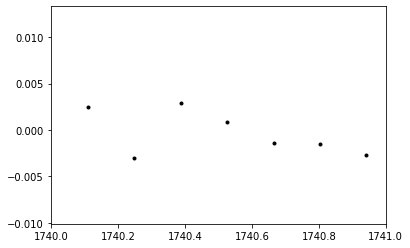

In [69]:
plt.plot(mean16T, mean16F, 'k.')
plt.xlim(1740,1741)

In [4]:
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile('04:12:46.845 +75:49:42.26').download()

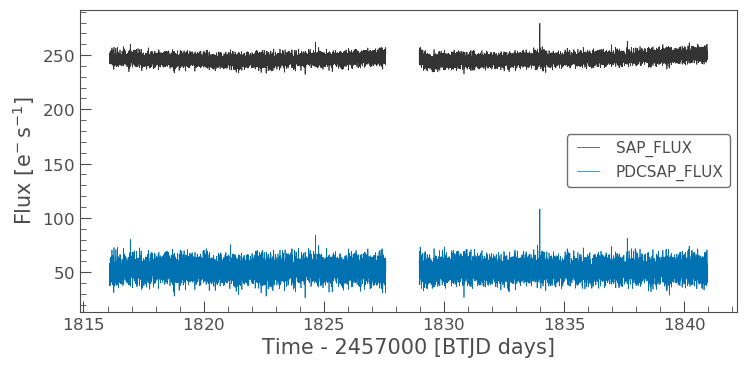

In [5]:
lcf.plot()

In [13]:
lc = lcf.PDCSAP_FLUX.remove_nans().remove_outliers()


flux = lc.flux
timein= lc.time



In [18]:
print(timein)

[1816.08776878 1816.08915769 1816.0905466  ... 1840.9586022  1840.95999107
 1840.96137995]


0.09538769054008327
10.483532983532983


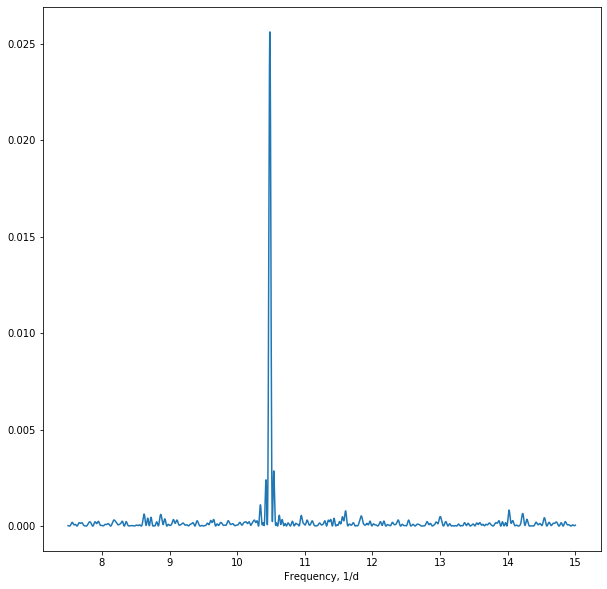

In [28]:
from astropy.timeseries import LombScargle
freq=np.linspace(7.5,15,1000000)
power = LombScargle(timein, flux).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq,power)
plt.xlabel("Frequency, 1/d")
plt.savefig('LS.eps', dpi=300)
idxM = np.argmax(power)
print(1/freq[idxM])
print(freq[idxM])
#12.449990499904999
#12.453300124533001

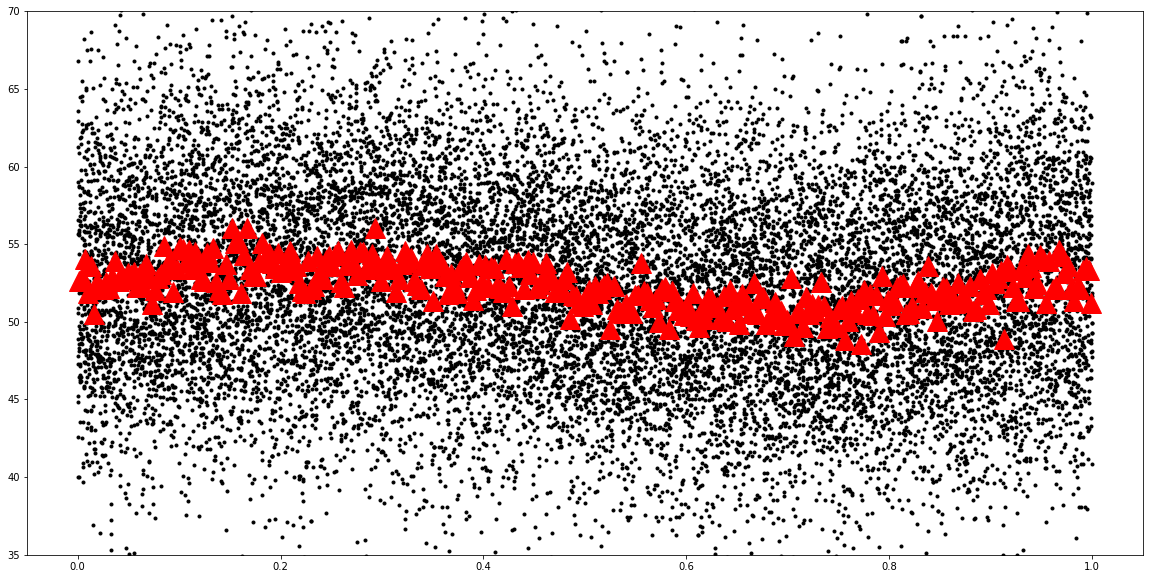

In [29]:
from PyAstronomy.pyasl import foldAt
initialTime = timein + 2457000.0
phasesTess = foldAt(initialTime, 0.09538769054008327, T0=0)
sortIndi = np.argsort(phasesTess)
phasesTess = phasesTess[sortIndi]
initialFluxMean = flux[sortIndi]
plt.figure(figsize=(20,10))
plt.plot(phasesTess, initialFluxMean, 'k.')


initialFluxMean1 = np.nanmean(np.pad(initialFluxMean.astype(float), (0, 50 - initialFluxMean.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)
phasesTess1 = np.nanmean(np.pad(phasesTess.astype(float), (0, 50 - phasesTess.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)



plt.plot(phasesTess1, initialFluxMean1, 'r^', markersize=20)
plt.ylim(35,70)
plt.savefig('Fold.eps', dpi=300)

In [2]:
lc16 = lk.search_lightcurvefile('GD356', sector=16).download().PDCSAP_FLUX.remove_nans()
lc23 = lk.search_lightcurvefile('GD356', sector=23).download().PDCSAP_FLUX.remove_nans()
lc24 = lk.search_lightcurvefile('GD356', sector=24).download().PDCSAP_FLUX.remove_nans()

gzip was not found on your system! You should solve this issue for astroquery.eso to be at its best!
On POSIX system: make sure gzip is installed and in your path!On Windows: same for 7-zip (http://www.7-zip.org)!


In [4]:
f16 = lc16.flux
t16 = lc16.time + 2457000
f16 = (f16/np.mean(f16))-1

f23 = lc23.flux
t23 = lc23.time + 2457000
f23 = (f23/np.mean(f23))-1

f24 = lc24.flux
t24 = lc24.time + 2457000
f24 = (f24/np.mean(f24))-1

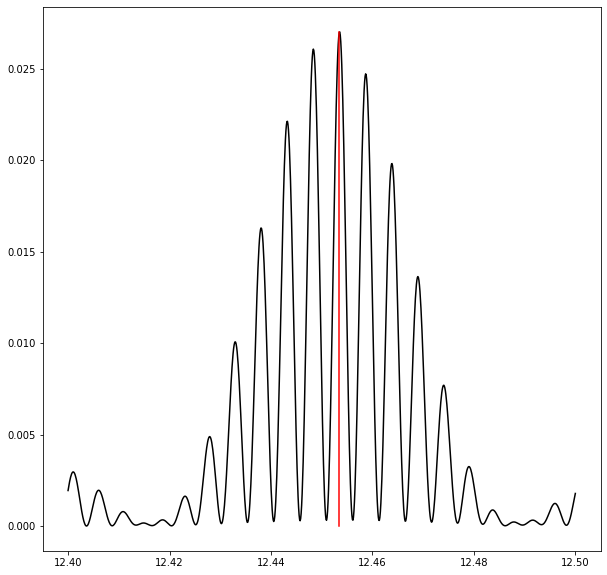

In [6]:
oldF = np.append(f16, f23)
oldT = np.append(t16,t23)
freq = np.linspace(12.4,12.5,1000)

powerPl = LombScargle(oldT,oldF).power(freq)
plt.figure(figsize=(10,10))
plt.plot(freq, powerPl, c='k')
bestF = 1/0.08029870250017346
plt.plot([bestF, bestF], [0, max(powerPl)], c='r')

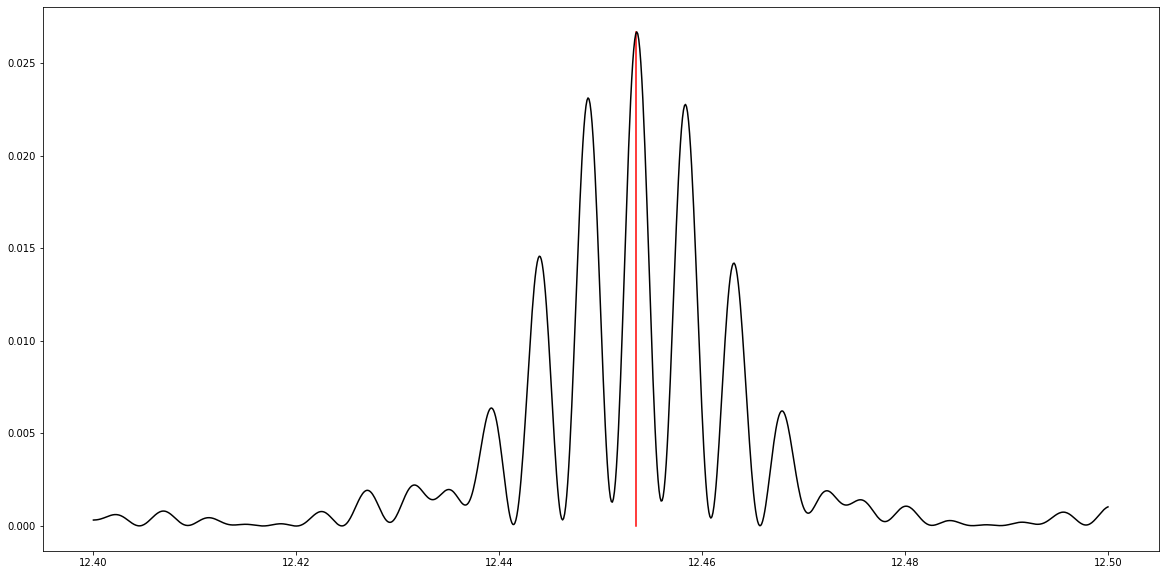

In [10]:
newF = np.append(oldF, f24)
newT = np.append(oldT,t24)
freq = np.linspace(12.4,12.5,1000)

powerPl = LombScargle(newT,newF).power(freq)
plt.figure(figsize=(20,10))
bestF = 1/0.08029870250017346
plt.plot([bestF, bestF], [0, max(powerPl)], c='r')
plt.plot(freq, powerPl, c='k')
plt.savefig('updatedLS.pdf')

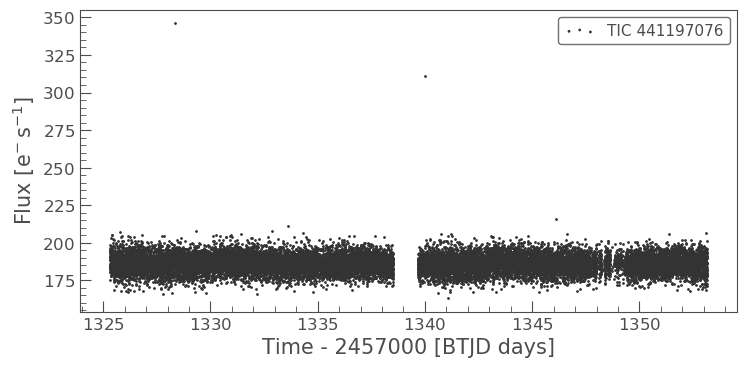

In [48]:
lc.scatter()
#plt.ylim(20,60)
#plt.savefig('0010+281lc.pdf')

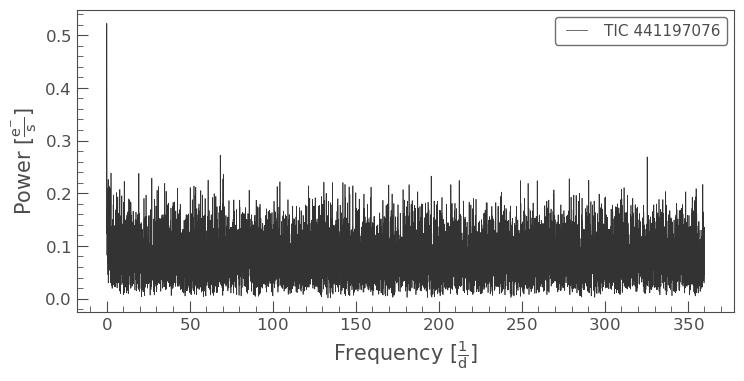

In [49]:
pg = lc.to_periodogram(oversample_factor=1)
pg.plot()
#plt.savefig('2218-271ls.pdf')

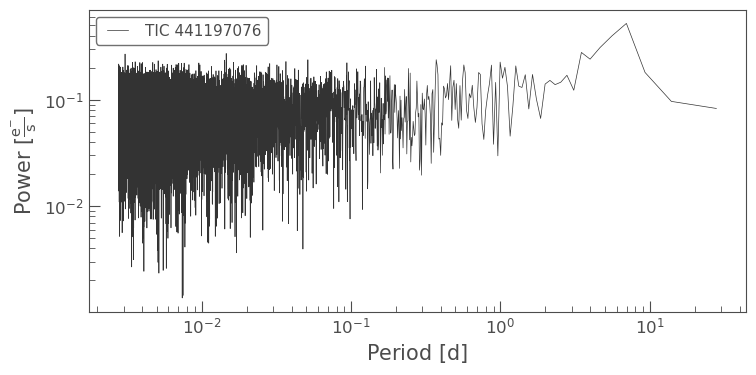

In [50]:
pg.plot(view='period', scale='log')
#plt.savefig('2218-271lsP.pdf')

In [51]:
pg.period_at_max_power

<Quantity 6.96678612 d>

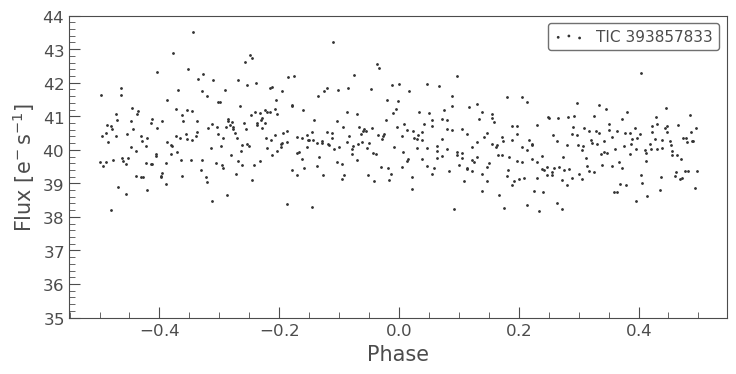

In [46]:



lc.bin(binsize=30).fold(pg.period_at_max_power).scatter()
plt.ylim(35,44)
plt.savefig('1132+471Fold.pdf')

In [10]:
len(lc.flux)

12873

In [11]:
lcsap = lk.search_lightcurvefile('PG 0010+281').download().SAP_FLUX.remove_nans() #here

In [12]:
len(lcsap.flux)

15604

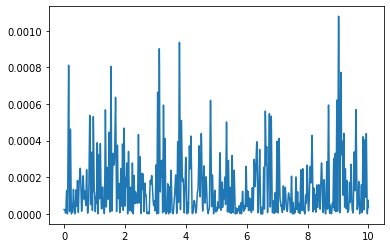

In [13]:
from astropy.timeseries import LombScargle
freq = np.linspace(0.001, 10, 10000)
power = LombScargle(lc.time,lc.flux).power(freq)
plt.plot(freq,power)

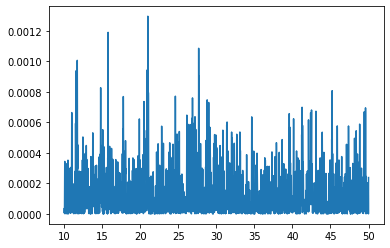

In [14]:
freq = np.linspace(10, 50, 10000)
power = LombScargle(lc.time,lc.flux).power(freq)
plt.plot(freq,power)

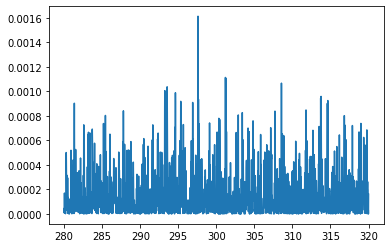

In [39]:
freq = np.linspace(280, 320, 10000)
power = LombScargle(lc.time,lc.flux).power(freq)
plt.plot(freq,power)

In [40]:
index = np.argmax(power)
freq[index]

297.5897589758976

In [18]:
1/81.95319531953196

0.012202086765513454

(20, 60)

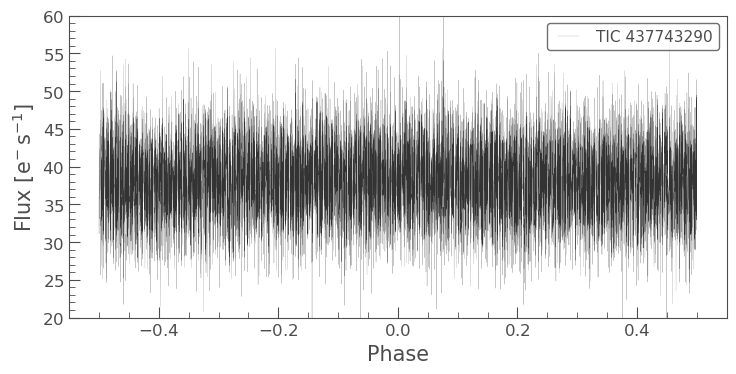

In [24]:
folded_lc = lc.fold(period=0.012202086765513454)
folded_lc.plot(lw=0.1)
plt.ylim(20,60)

In [22]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

(20, 60)

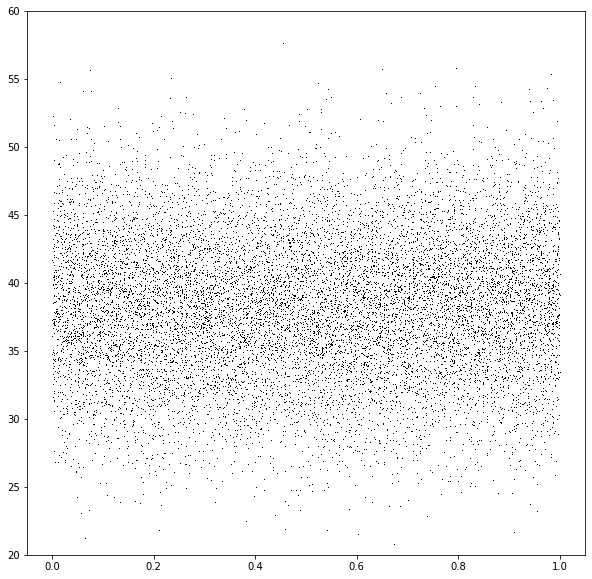

In [30]:
phases = foldMeth(lc.time, 0.012202086765513454)
plt.figure(figsize=(10,10))
plt.plot(phases, lc.flux, 'k,')
plt.ylim(20,60)

In [33]:
meanFlux = np.nanmean(np.pad(lc.flux.astype(float), (0, 50 - lc.flux.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)
meanTime = np.nanmean(np.pad(lc.time.astype(float), (0, 50 - lc.time.size%50), mode='constant', constant_values=np.NaN).reshape(-1, 50), axis=1)

(35, 40)

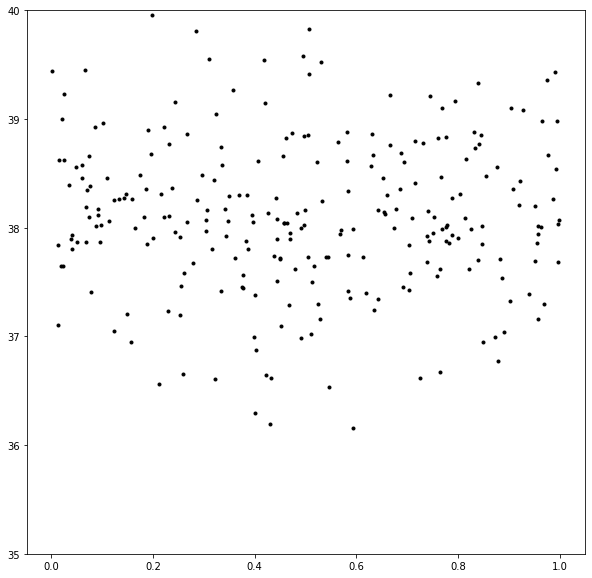

In [36]:
phases = foldMeth(meanTime, 0.012202086765513454)
plt.figure(figsize=(10,10))
plt.plot(phases, meanFlux, 'k.')
plt.ylim(35,40)

In [41]:
1/297.5897589758976

0.0033603306896088183

In [38]:
0.0033333333333333335*24*60

4.8

(20, 60)

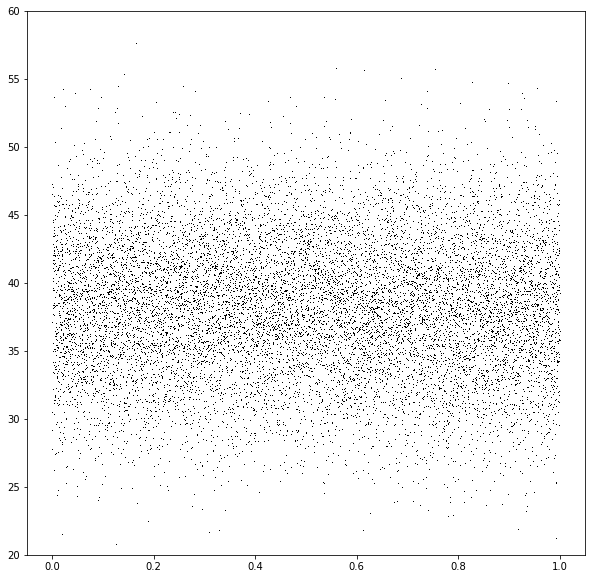

In [42]:
phases = foldMeth(lc.time, 0.0033603306896088183)
plt.figure(figsize=(10,10))
plt.plot(phases, lc.flux, 'k,')
plt.ylim(20,60)

(35, 40)

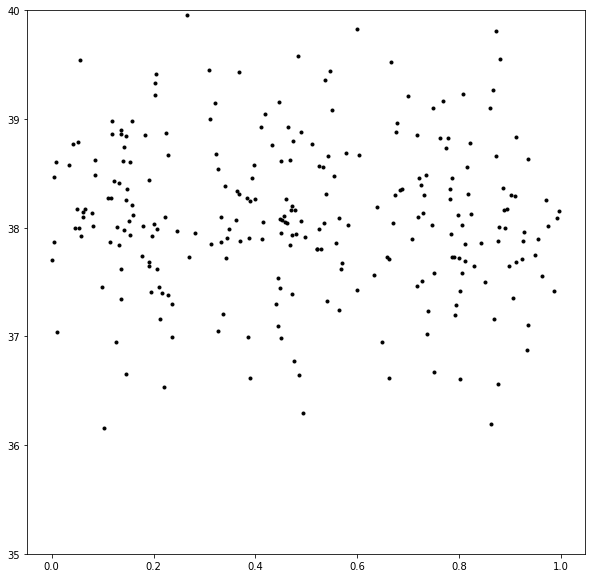

In [43]:
phases = foldMeth(meanTime, 0.0033603306896088183)
plt.figure(figsize=(10,10))
plt.plot(phases, meanFlux, 'k.')
plt.ylim(35,40)